- R2score가 현저히 낮기 때문에 해결 방법을 모색
    - 테스트 데이터가 부족해서 설명을 하지 못하지 않나.
        - 날짜기준으로 train, test를 나누어서 train 데이터를 train_test_split 하지말고
          전체 데이터에서 train_test_split (test_size = 0.4)으로 나누자
    - 에포크를 100에서 1000으로 늘려보자

In [495]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# 데이터 불러오기

- 데이터은 트리검사로 feature_importance하여 중요도가 0인 피처를 제외하고 사용

In [21]:
df = pd.read_csv("./data/project_data/all_data.csv")

In [22]:
df.head()

,SO2_incheon_0,CO_incheon_0,O3_incheon_0,NO2_incheon_0,PM10_incheon_0,datetime,SO2_incheon_1,CO_incheon_1,O3_incheon_1,NO2_incheon_1,...,3h_3,3h_4,3h_5,3h_6,3h_7,3h_8,quarter_1,quarter_2,quarter_3,quarter_4
0,0.007,0.2,0.015,0.004,73.0,2015-01-01 00:00:00,0.0027,0.2,0.026,0.0024,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.007,0.2,0.015,0.005,93.0,2015-01-01 01:00:00,0.0029,0.2,0.025,0.0023,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.007,0.1,0.015,0.004,100.0,2015-01-01 02:00:00,0.0030,0.2,0.024,0.0025,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.006,0.1,0.014,0.004,111.0,2015-01-01 03:00:00,0.0027,0.2,0.024,0.0022,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.007,0.1,0.014,0.004,131.0,2015-01-01 04:00:00,0.0021,0.2,0.024,0.0020,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [23]:
df.shape

(67176, 2530)

# 훈련, 테스트 셋 분리

In [24]:
x = df.drop(["datetime", "PM10_y_bin"], axis = 1)
y = df["PM10_y_bin"]

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 8)

# MinMax

In [273]:
mm = MinMaxScaler()

In [274]:
scaled_train = mm.fit_transform(x_train)
scaled_test = mm.transform(x_test)

# feature important

In [28]:
rf = RandomForestRegressor(random_state = 8)

In [29]:
%%time
rf.fit(scaled_train, y_train)

Wall time: 31min 30s


RandomForestRegressor(random_state=8)

In [30]:
feature = rf.feature_importances_.tolist()

In [31]:
feature_df = pd.DataFrame(feature, x.columns)

In [32]:
drop_columns = feature_df[feature_df[0] == 0]

In [33]:
drop_columns.index.tolist()

['x0_9.0_bangryeong_0',
 'x0_10.0_bangryeong_0',
 'x0_43.0_bangryeong_0',
 'x0_70.0_bangryeong_0',
 'x0_71.0_bangryeong_0',
 'x0_201.0_bangryeong_0',
 'x0_401.0_bangryeong_0',
 'x0_501.0_bangryeong_0',
 'x0_806.0_bangryeong_0',
 'x0_901.0_bangryeong_0',
 'x0_1001.0_bangryeong_0',
 'x0_1005.0_bangryeong_0',
 'x0_1006.0_bangryeong_0',
 'x0_1008.0_bangryeong_0',
 'x0_1105.0_bangryeong_0',
 'x0_1301.0_bangryeong_0',
 'x0_1304.0_bangryeong_0',
 'x0_1401.0_bangryeong_0',
 'x0_1404.0_bangryeong_0',
 'x0_1604.0_bangryeong_0',
 'x0_1605.0_bangryeong_0',
 'x0_1606.0_bangryeong_0',
 'x0_1611.0_bangryeong_0',
 'x0_1908.0_bangryeong_0',
 'x0_1909.0_bangryeong_0',
 'x0_1910.0_bangryeong_0',
 'x0_1911.0_bangryeong_0',
 'x0_1914.0_bangryeong_0',
 'x0_2205.0_bangryeong_0',
 'x0_4004.0_bangryeong_0',
 'x0_4005.0_bangryeong_0',
 'x0_4008.0_bangryeong_0',
 'x0_4010.0_bangryeong_0',
 'x0_4204.0_bangryeong_0',
 'x0_4205.0_bangryeong_0',
 'x0_4206.0_bangryeong_0',
 'x0_7001.0_bangryeong_0',
 'x0_7005.0_bangr

In [34]:
drop_col = drop_columns.index.tolist()

In [35]:
X0= []
Etc = []
for column in drop_col :
    if "x0" in column :
        X0.append(column)
    else :
        Etc.append(column)

In [36]:
X0

['x0_9.0_bangryeong_0',
 'x0_10.0_bangryeong_0',
 'x0_43.0_bangryeong_0',
 'x0_70.0_bangryeong_0',
 'x0_71.0_bangryeong_0',
 'x0_201.0_bangryeong_0',
 'x0_401.0_bangryeong_0',
 'x0_501.0_bangryeong_0',
 'x0_806.0_bangryeong_0',
 'x0_901.0_bangryeong_0',
 'x0_1001.0_bangryeong_0',
 'x0_1005.0_bangryeong_0',
 'x0_1006.0_bangryeong_0',
 'x0_1008.0_bangryeong_0',
 'x0_1105.0_bangryeong_0',
 'x0_1301.0_bangryeong_0',
 'x0_1304.0_bangryeong_0',
 'x0_1401.0_bangryeong_0',
 'x0_1404.0_bangryeong_0',
 'x0_1604.0_bangryeong_0',
 'x0_1605.0_bangryeong_0',
 'x0_1606.0_bangryeong_0',
 'x0_1611.0_bangryeong_0',
 'x0_1908.0_bangryeong_0',
 'x0_1909.0_bangryeong_0',
 'x0_1910.0_bangryeong_0',
 'x0_1911.0_bangryeong_0',
 'x0_1914.0_bangryeong_0',
 'x0_2205.0_bangryeong_0',
 'x0_4004.0_bangryeong_0',
 'x0_4005.0_bangryeong_0',
 'x0_4008.0_bangryeong_0',
 'x0_4010.0_bangryeong_0',
 'x0_4204.0_bangryeong_0',
 'x0_4205.0_bangryeong_0',
 'x0_4206.0_bangryeong_0',
 'x0_7001.0_bangryeong_0',
 'x0_7005.0_bangr

In [37]:
Etc

['icsr_ganghwado_2', 'icsr_icheon_3', 'icsr_yangpyeong_7']

In [54]:
drop_X0 = pd.DataFrame(X0)

In [55]:
drop_X0.to_csv("./data/project_data/drop_X0.csv", index = False)

In [38]:
len(drop_col)

1577

- feature_importance로 1577개 피처 제거

In [40]:
# 데이터 저장
ndf.to_csv("./data/project_data/feature_df.ver2.csv", index = False)

In [496]:
ndf = pd.read_csv("./data/project_data/feature_df.ver2.csv")

# 훈련, 테스트 셋 분리

In [497]:
x = ndf.drop(["datetime", "PM10_y_bin"], axis = 1)
y = ndf["PM10_y_bin"]

In [498]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 8)

# MinMax

In [499]:
mm = MinMaxScaler()

In [500]:
scaled_train = mm.fit_transform(x_train)
scaled_test = mm.transform(x_test)

In [501]:
scaled_train.shape, scaled_test.shape

((40305, 951), (26871, 951))

In [502]:
scaled_train = scaled_train.reshape(-1, 951, 1)
scaled_test = scaled_test.reshape(-1, 951, 1)

In [503]:
# 성능지표
def loss_metrics(y_true, y_pred) :
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    msle = mean_squared_log_error(y_true, y_pred)
    rmsle = np.sqrt(msle)
    return print("MSE : ", mse, "\nRMSE : ", rmse, "\nMAE : ", mae, "\nMSLE : ", msle, "\nRMSLE : ", rmsle,)

In [504]:
def plus(pred_df) :
    pred_df["PM10_y_bin"] = pred_df["PM10_y_bin"].map(lambda x : x + 1)
    pred_df.rename(columns = {0 : "pred"}, inplace = True)
    pred_df["pred"] = pred_df["pred"].map(lambda x : x + 1)
    loss_metrics(pred_df.iloc[:,0], pred_df.iloc[:,1])
    return loss_metrics

In [505]:
# 예측값, 실제값 그래프
def graph(pred_df) :
    round_pred = round(pred_df[0], 0)
    plt.figure()

    ax1 = sns.distplot(y_test, hist=False, label="y_test")
    ax2 = sns.distplot(round_pred, hist=False, label="y_pred", ax=ax1)

    plt.legend()
    plt.show()
    return plt.show()

# Model1


- optimizer = Adam (learning_rate = 0.0001)
- loss = "mse"
- epochs = 1000, batch_size = 64
- kernel_size = 3


- Conv1D(64)
- MaxPool1D(3)
- Dropout(0.3)
- Conv1D(64)
- MaxPool1D(3)
- Dropout(0.3)
- Flatten()
- Dense(64)
- Dense(32)
- Dropout(0.3)
- Dense(1)

In [50]:
model = Sequential()
model.add(Conv1D(filters = 64, kernel_size = 3, activation = "relu", padding = "same", input_shape = (951,1)))
model.add(keras.layers.MaxPool1D(3))
model.add(Dropout(0.3))
model.add(Conv1D(filters = 64, kernel_size = 3, activation = "relu", padding = "same"))
model.add(keras.layers.MaxPool1D(3))
model.add(Dropout(0.3))
model.add(keras.layers.Flatten())
model.add(Dense(64, activation = "relu"))
model.add(Dense(32, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(1))

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 951, 64)           256       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 317, 64)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 317, 64)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 317, 64)           12352     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 105, 64)          0         
 1D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 105, 64)           0

In [56]:
checkpoint = keras.callbacks.ModelCheckpoint("./model/epoch_best_model.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 15, restore_best_weights=True)
adam = keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(loss = "mse", optimizer = adam, metrics = ["mae"])
history = model.fit(scaled_train, y_train, validation_split = 0.2, epochs = 1000, callbacks = [early_stopping_cb, checkpoint], batch_size = 64)

Epoch 1/1000
504/504 [==============================] - 37s 73ms/step - loss: 0.2662 - mae: 0.4054 - val_loss: 0.2790 - val_mae: 0.4221
Epoch 2/1000
504/504 [==============================] - 35s 70ms/step - loss: 0.2660 - mae: 0.4047 - val_loss: 0.2982 - val_mae: 0.4356
Epoch 3/1000
504/504 [==============================] - 35s 70ms/step - loss: 0.2623 - mae: 0.4011 - val_loss: 0.2710 - val_mae: 0.4143
Epoch 4/1000
504/504 [==============================] - 36s 71ms/step - loss: 0.2623 - mae: 0.4007 - val_loss: 0.2860 - val_mae: 0.4247
Epoch 5/1000
504/504 [==============================] - 37s 73ms/step - loss: 0.2597 - mae: 0.4003 - val_loss: 0.2784 - val_mae: 0.4200
Epoch 6/1000
504/504 [==============================] - 35s 70ms/step - loss: 0.2590 - mae: 0.3983 - val_loss: 0.2647 - val_mae: 0.4079
Epoch 7/1000
504/504 [==============================] - 35s 70ms/step - loss: 0.2585 - mae: 0.3988 - val_loss: 0.2693 - val_mae: 0.4106
Epoch 8/1000
504/504 [==========================

Epoch 61/1000
504/504 [==============================] - 35s 69ms/step - loss: 0.1879 - mae: 0.3384 - val_loss: 0.2107 - val_mae: 0.3558
Epoch 62/1000
504/504 [==============================] - 34s 68ms/step - loss: 0.1870 - mae: 0.3371 - val_loss: 0.2111 - val_mae: 0.3557
Epoch 63/1000
504/504 [==============================] - 34s 68ms/step - loss: 0.1881 - mae: 0.3382 - val_loss: 0.2123 - val_mae: 0.3581
Epoch 64/1000
504/504 [==============================] - 35s 69ms/step - loss: 0.1867 - mae: 0.3373 - val_loss: 0.2120 - val_mae: 0.3556
Epoch 65/1000
504/504 [==============================] - 35s 68ms/step - loss: 0.1847 - mae: 0.3349 - val_loss: 0.2102 - val_mae: 0.3527
Epoch 66/1000
504/504 [==============================] - 35s 69ms/step - loss: 0.1838 - mae: 0.3342 - val_loss: 0.2120 - val_mae: 0.3613
Epoch 67/1000
504/504 [==============================] - 35s 69ms/step - loss: 0.1826 - mae: 0.3333 - val_loss: 0.2112 - val_mae: 0.3570
Epoch 68/1000
504/504 [==================

504/504 [==============================] - 34s 68ms/step - loss: 0.1028 - mae: 0.2429 - val_loss: 0.1821 - val_mae: 0.3135
Epoch 180/1000
504/504 [==============================] - 35s 69ms/step - loss: 0.1037 - mae: 0.2433 - val_loss: 0.1822 - val_mae: 0.3126
Epoch 181/1000
504/504 [==============================] - 34s 68ms/step - loss: 0.1024 - mae: 0.2422 - val_loss: 0.1814 - val_mae: 0.3155
Epoch 182/1000
504/504 [==============================] - 34s 68ms/step - loss: 0.1013 - mae: 0.2405 - val_loss: 0.1824 - val_mae: 0.3133
Epoch 183/1000
504/504 [==============================] - 34s 68ms/step - loss: 0.1010 - mae: 0.2410 - val_loss: 0.1816 - val_mae: 0.3102
Epoch 184/1000
504/504 [==============================] - 34s 68ms/step - loss: 0.1004 - mae: 0.2396 - val_loss: 0.1813 - val_mae: 0.3123
Epoch 185/1000
504/504 [==============================] - 35s 69ms/step - loss: 0.1003 - mae: 0.2396 - val_loss: 0.1800 - val_mae: 0.3107
Epoch 186/1000
504/504 [=========================

In [408]:
y_pred = model.predict(scaled_test)

840/840 [==============================] - 7s 8ms/step


In [409]:
pred_df = pd.DataFrame(y_pred, y_test).reset_index()

In [100]:
pred_df

,PM10_y_bin,0
0,1,0.910140
1,1,0.306953
2,1,0.923599
3,0,0.019595
4,0,0.359909
...,...,...
26866,3,1.738666
26867,1,1.061840
26868,0,0.074563
26869,1,0.770028


C:\Users\tmdwn\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\tmdwn\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


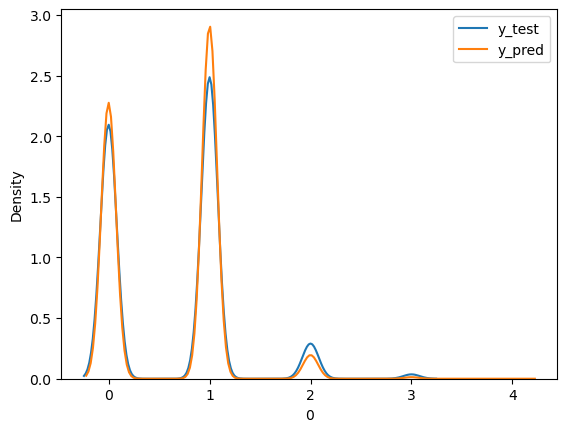

In [62]:
graph(pred_df)

In [410]:
plus(pred_df)

MSE :  0.17348967269621604 
RMSE :  0.41652091507656136 
MAE :  0.3034666011940448 
MSLE :  0.024589121264817167 
RMSLE :  0.156809187437526


<function __main__.loss_metrics(y_true, y_pred)>

In [411]:
r2_score(y_test, y_pred)

0.555911368322916

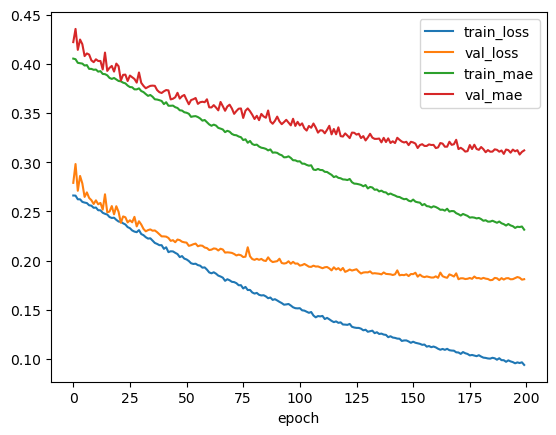

In [70]:
plt.figure()
plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["mae"], label = "train_mae")
plt.plot(history.history["val_mae"], label = "val_mae")

plt.xlabel("epoch")
plt.legend()
plt.show()

- 과대적합 발생
    - epoch가 25 이후에는 과대적합이 발생하기 시작
    - epoch 25까지만 훈련시켜보자

# Model2

- optimizer = Adam (learning_rate = 0.0001)
- loss = "mse"
- epochs = 25, batch_size = 64
- kernel_size = 3


- Conv1D(64)
- MaxPool1D(3)
- Dropout(0.3)
- Conv1D(64)
- MaxPool1D(3)
- Dropout(0.3)
- Dense(64)
- Dense(32)
- Dropout(0.3)


In [107]:
scaled_train.shape, scaled_test.shape

((40305, 951, 1), (26871, 951, 1))

In [108]:
model2 = Sequential()
model2.add(Conv1D(filters = 64, kernel_size=3, activation = "relu", padding = "same", input_shape = (951,1)))
model2.add(keras.layers.MaxPool1D(3))
model2.add(Dropout(0.3))
model2.add(Conv1D(filters = 64, kernel_size=3, activation = "relu", padding = "same"))
model2.add(keras.layers.MaxPool1D(3))
model2.add(Dropout(0.3))
model2.add(keras.layers.Flatten())
model2.add(Dense(64, activation = "relu"))
model2.add(Dense(32, activation = "relu"))
model2.add(Dropout(0.3))
model2.add(Dense(1))

In [109]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 951, 64)           256       
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 317, 64)          0         
 1D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 317, 64)           0         
                                                                 
 conv1d_7 (Conv1D)           (None, 317, 64)           12352     
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 105, 64)          0         
 1D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 105, 64)          

In [110]:
scaled_train.shape, y_train.shape

((40305, 951, 1), (40305,))

In [111]:
checkpoint = keras.callbacks.ModelCheckpoint("./model/epoch_best_model2.h5", save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 15, restore_best_weights = True)
adam = keras.optimizers.Adam(learning_rate = 0.0001)
model2.compile(loss = "mse", optimizer = adam, metrics = ["mae"] )
history2 = model2.fit(scaled_train, y_train, validation_split = 0.2, epochs = 25, callbacks = [early_stopping_cb, checkpoint], batch_size = 64)

Epoch 1/25
504/504 [==============================] - 41s 79ms/step - loss: 0.3446 - mae: 0.4849 - val_loss: 0.3697 - val_mae: 0.4888
Epoch 2/25
504/504 [==============================] - 40s 80ms/step - loss: 0.3055 - mae: 0.4448 - val_loss: 0.3299 - val_mae: 0.4650
Epoch 3/25
504/504 [==============================] - 39s 78ms/step - loss: 0.2999 - mae: 0.4386 - val_loss: 0.3296 - val_mae: 0.4563
Epoch 4/25
504/504 [==============================] - 38s 75ms/step - loss: 0.2924 - mae: 0.4324 - val_loss: 0.3306 - val_mae: 0.4571
Epoch 5/25
504/504 [==============================] - 38s 75ms/step - loss: 0.2898 - mae: 0.4283 - val_loss: 0.3309 - val_mae: 0.4595
Epoch 6/25
504/504 [==============================] - 37s 74ms/step - loss: 0.2869 - mae: 0.4249 - val_loss: 0.2978 - val_mae: 0.4383
Epoch 7/25
504/504 [==============================] - 37s 74ms/step - loss: 0.2836 - mae: 0.4225 - val_loss: 0.2876 - val_mae: 0.4309
Epoch 8/25
504/504 [==============================] - 37s 74ms

In [412]:
y_pred2 = model2.predict(scaled_test)

840/840 [==============================] - 6s 7ms/step


In [413]:
pred_df = pd.DataFrame(y_pred2, y_test).reset_index()

In [114]:
pred_df

,PM10_y_bin,0
0,1,0.859140
1,1,0.338669
2,1,0.630534
3,0,0.766755
4,0,0.483772
...,...,...
26866,3,0.921867
26867,1,0.631852
26868,0,0.085709
26869,1,0.305475


C:\Users\tmdwn\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\tmdwn\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


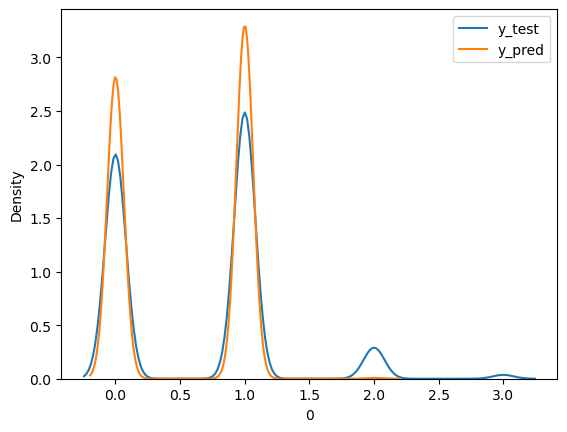

In [115]:
graph(pred_df)

In [414]:
plus(pred_df)

MSE :  0.2651432623580536 
RMSE :  0.5149206369510292 
MAE :  0.4132891334489319 
MSLE :  0.03494962947857534 
RMSLE :  0.18694819998752418


<function __main__.loss_metrics(y_true, y_pred)>

In [415]:
r2_score(y_test, y_pred2)

0.32130191527213425

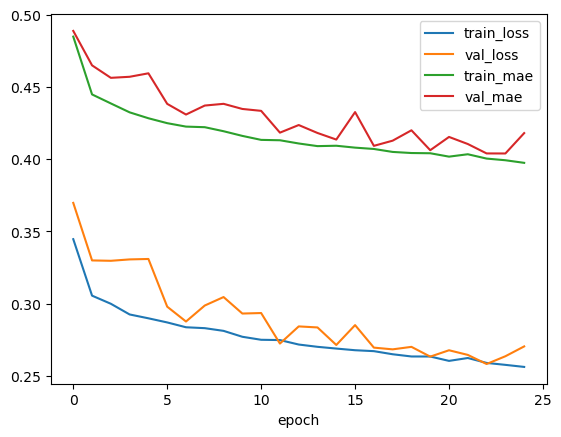

In [118]:
plt.figure()

plt.plot(history2.history["loss"], label = "train_loss")
plt.plot(history2.history["val_loss"], label = "val_loss")
plt.plot(history2.history["mae"], label = "train_mae")
plt.plot(history2.history["val_mae"], label = "val_mae")

plt.xlabel("epoch")
plt.legend()
plt.show()

- 오히려 성능지표는 더 안좋아졌다.
    - 과대적합일 시 해결방안을 하나씩 변경해보자
        - 1) 모델을 간소화
        - 2) epoch 줄이기
        - 3) dropout 비율 늘리기

# Model3

- 모델을 기존보다 간단하게 만들자
    - 출력층 전 Dense 삭제
    
    
- optimizer = Adam (learning_rate = 0.0001)
- loss = "mse"
- epochs = 1000, batch_size = 64
- kernel_size = 3


- Conv1D(64)
- MaxPool1D(3)
- Dropout(0.3)
- Conv1D(64)
- MaxPool1D(3)
- Dropout(0.3)
- Dense(64)
- Dropout(0.3)

In [119]:
scaled_train.shape, scaled_test.shape

((40305, 951, 1), (26871, 951, 1))

- 출력층 전 Dense를 없애보자

In [120]:
model3 = Sequential()
model3.add(Conv1D(filters = 64, kernel_size=3, activation = "relu", padding = "same", input_shape = (951,1)))
model3.add(keras.layers.MaxPool1D(3))
model3.add(Dropout(0.3))
model3.add(Conv1D(filters = 64, kernel_size=3, activation = "relu", padding = "same"))
model3.add(keras.layers.MaxPool1D(3))
model3.add(Dropout(0.3))
model3.add(keras.layers.Flatten())
model3.add(Dense(64, activation = "relu"))
model3.add(Dropout(0.3))
model3.add(Dense(1))

In [121]:
model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 951, 64)           256       
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 317, 64)          0         
 1D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 317, 64)           0         
                                                                 
 conv1d_9 (Conv1D)           (None, 317, 64)           12352     
                                                                 
 max_pooling1d_9 (MaxPooling  (None, 105, 64)          0         
 1D)                                                             
                                                                 
 dropout_13 (Dropout)        (None, 105, 64)          

In [122]:
checkpoint = keras.callbacks.ModelCheckpoint("./model/epoch_best_model3.h5", save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 15, restore_best_weights = True)
adam = keras.optimizers.Adam(learning_rate = 0.0001)
model3.compile(loss = "mse", optimizer = adam, metrics = ["mae"] )
history3 = model3.fit(scaled_train, y_train, validation_split = 0.2, epochs = 1000, callbacks = [early_stopping_cb, checkpoint], batch_size = 64)

Epoch 1/1000
504/504 [==============================] - 35s 68ms/step - loss: 0.3222 - mae: 0.4702 - val_loss: 0.3375 - val_mae: 0.4759
Epoch 2/1000
504/504 [==============================] - 34s 68ms/step - loss: 0.2951 - mae: 0.4391 - val_loss: 0.3044 - val_mae: 0.4413
Epoch 3/1000
504/504 [==============================] - 34s 68ms/step - loss: 0.2886 - mae: 0.4298 - val_loss: 0.3206 - val_mae: 0.4534
Epoch 4/1000
504/504 [==============================] - 34s 68ms/step - loss: 0.2840 - mae: 0.4248 - val_loss: 0.2871 - val_mae: 0.4237
Epoch 5/1000
504/504 [==============================] - 35s 69ms/step - loss: 0.2800 - mae: 0.4209 - val_loss: 0.3070 - val_mae: 0.4416
Epoch 6/1000
504/504 [==============================] - 34s 68ms/step - loss: 0.2779 - mae: 0.4200 - val_loss: 0.2927 - val_mae: 0.4304
Epoch 7/1000
504/504 [==============================] - 38s 76ms/step - loss: 0.2765 - mae: 0.4160 - val_loss: 0.2987 - val_mae: 0.4341
Epoch 8/1000
504/504 [==========================

Epoch 61/1000
504/504 [==============================] - 34s 68ms/step - loss: 0.2292 - mae: 0.3762 - val_loss: 0.2379 - val_mae: 0.3833
Epoch 62/1000
504/504 [==============================] - 34s 68ms/step - loss: 0.2295 - mae: 0.3776 - val_loss: 0.2359 - val_mae: 0.3841
Epoch 63/1000
504/504 [==============================] - 34s 68ms/step - loss: 0.2280 - mae: 0.3754 - val_loss: 0.2347 - val_mae: 0.3830
Epoch 64/1000
504/504 [==============================] - 34s 68ms/step - loss: 0.2278 - mae: 0.3758 - val_loss: 0.2339 - val_mae: 0.3836
Epoch 65/1000
504/504 [==============================] - 34s 68ms/step - loss: 0.2271 - mae: 0.3759 - val_loss: 0.2354 - val_mae: 0.3832
Epoch 66/1000
504/504 [==============================] - 34s 68ms/step - loss: 0.2266 - mae: 0.3752 - val_loss: 0.2341 - val_mae: 0.3810
Epoch 67/1000
504/504 [==============================] - 34s 68ms/step - loss: 0.2258 - mae: 0.3754 - val_loss: 0.2319 - val_mae: 0.3801
Epoch 68/1000
504/504 [==================

504/504 [==============================] - 37s 74ms/step - loss: 0.1550 - mae: 0.3103 - val_loss: 0.1897 - val_mae: 0.3403
Epoch 180/1000
504/504 [==============================] - 37s 72ms/step - loss: 0.1546 - mae: 0.3106 - val_loss: 0.1886 - val_mae: 0.3394
Epoch 181/1000
504/504 [==============================] - 36s 72ms/step - loss: 0.1532 - mae: 0.3091 - val_loss: 0.1885 - val_mae: 0.3381
Epoch 182/1000
504/504 [==============================] - 37s 73ms/step - loss: 0.1532 - mae: 0.3093 - val_loss: 0.1884 - val_mae: 0.3397
Epoch 183/1000
504/504 [==============================] - 37s 73ms/step - loss: 0.1533 - mae: 0.3092 - val_loss: 0.1921 - val_mae: 0.3405
Epoch 184/1000
504/504 [==============================] - 36s 72ms/step - loss: 0.1526 - mae: 0.3079 - val_loss: 0.1886 - val_mae: 0.3401
Epoch 185/1000
504/504 [==============================] - 37s 73ms/step - loss: 0.1519 - mae: 0.3072 - val_loss: 0.1890 - val_mae: 0.3395
Epoch 186/1000
504/504 [=========================

In [416]:
y_pred3 = model3.predict(scaled_test)

840/840 [==============================] - 6s 7ms/step


In [417]:
pred_df = pd.DataFrame(y_pred3, y_test).reset_index()

In [125]:
pred_df

,PM10_y_bin,0
0,1,1.120316
1,1,0.422813
2,1,0.615555
3,0,-0.229134
4,0,0.500670
...,...,...
26866,3,2.048048
26867,1,0.603793
26868,0,0.103948
26869,1,0.690817


C:\Users\tmdwn\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\tmdwn\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


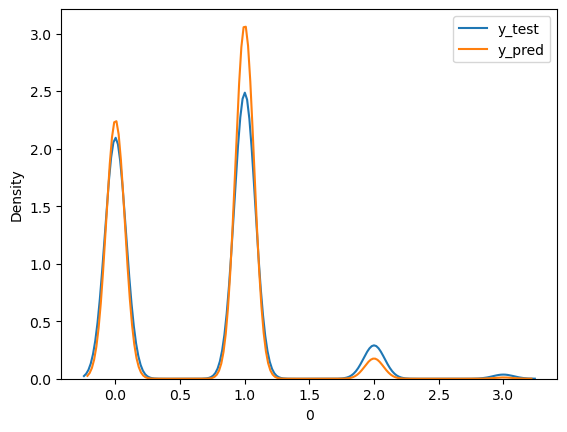

In [126]:
graph(pred_df)

In [418]:
plus(pred_df)

MSE :  0.17101203275967775 
RMSE :  0.41353601144238666 
MAE :  0.3179209678588796 
MSLE :  0.024470853750123235 
RMSLE :  0.1564316264382725


<function __main__.loss_metrics(y_true, y_pred)>

In [419]:
r2_score(y_test, y_pred3)

0.5622534849002665

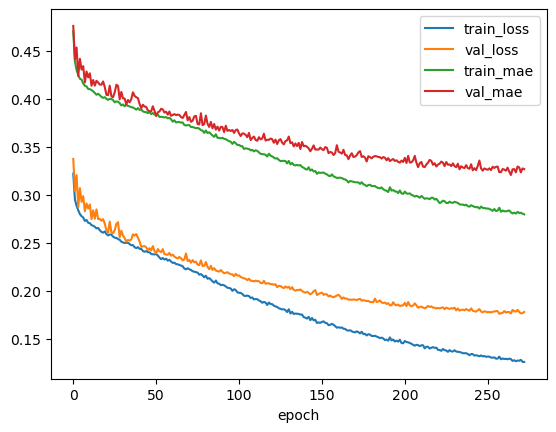

In [129]:
plt.figure()

plt.plot(history3.history["loss"], label = "train_loss")
plt.plot(history3.history["val_loss"], label = "val_loss")
plt.plot(history3.history["mae"], label = "train_mae")
plt.plot(history3.history["val_mae"], label = "val_mae")

plt.xlabel("epoch")
plt.legend()
plt.show()

# Model4

- epoch를 줄여서 500으로 사용


- optimizer = Adam (learning_rate = 0.0001)
- loss = "mse"
- epochs = 500, batch_size = 64
- kernel_size = 3


- Conv1D(64)
- MaxPool1D(3)
- Dropout(0.3)
- Conv1D(64)
- MaxPool1D(3)
- Dropout(0.3)
- Dense(64)
- Dense(32)
- Dropout(0.3)

In [130]:
scaled_train.shape, scaled_test.shape

((40305, 951, 1), (26871, 951, 1))

In [131]:
model4 = Sequential()
model4.add(Conv1D(filters = 64, kernel_size=3, activation = "relu", padding = "same", input_shape = (951,1)))
model4.add(keras.layers.MaxPool1D(3))
model4.add(Dropout(0.3))
model4.add(Conv1D(filters = 64, kernel_size=3, activation = "relu", padding = "same"))
model4.add(keras.layers.MaxPool1D(3))
model4.add(Dropout(0.3))
model4.add(keras.layers.Flatten())
model4.add(Dense(64, activation = "relu"))
model4.add(Dense(32, activation = "relu"))
model4.add(Dropout(0.3))
model4.add(Dense(1))

In [132]:
model4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 951, 64)           256       
                                                                 
 max_pooling1d_10 (MaxPoolin  (None, 317, 64)          0         
 g1D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 317, 64)           0         
                                                                 
 conv1d_11 (Conv1D)          (None, 317, 64)           12352     
                                                                 
 max_pooling1d_11 (MaxPoolin  (None, 105, 64)          0         
 g1D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 105, 64)          

In [133]:
checkpoint = keras.callbacks.ModelCheckpoint("./model/epoch_best_model4.h5", save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 15, restore_best_weights = True)
adam = keras.optimizers.Adam(learning_rate = 0.0001)
model4.compile(loss = "mse", optimizer = adam, metrics = ["mae"] )
history4 = model4.fit(scaled_train, y_train, validation_split = 0.2, epochs = 500, callbacks = [early_stopping_cb, checkpoint], batch_size = 64)

Epoch 1/500
504/504 [==============================] - 38s 73ms/step - loss: 0.3536 - mae: 0.4862 - val_loss: 0.3357 - val_mae: 0.4773
Epoch 2/500
504/504 [==============================] - 37s 73ms/step - loss: 0.3180 - mae: 0.4546 - val_loss: 0.3400 - val_mae: 0.4651
Epoch 3/500
504/504 [==============================] - 37s 73ms/step - loss: 0.3076 - mae: 0.4443 - val_loss: 0.3070 - val_mae: 0.4550
Epoch 4/500
504/504 [==============================] - 37s 73ms/step - loss: 0.3016 - mae: 0.4393 - val_loss: 0.3354 - val_mae: 0.4656
Epoch 5/500
504/504 [==============================] - 37s 73ms/step - loss: 0.2987 - mae: 0.4352 - val_loss: 0.3135 - val_mae: 0.4513
Epoch 6/500
504/504 [==============================] - 36s 71ms/step - loss: 0.2950 - mae: 0.4311 - val_loss: 0.2901 - val_mae: 0.4320
Epoch 7/500
504/504 [==============================] - 35s 69ms/step - loss: 0.2901 - mae: 0.4282 - val_loss: 0.2983 - val_mae: 0.4342
Epoch 8/500
504/504 [==============================] - 

504/504 [==============================] - 35s 70ms/step - loss: 0.1462 - mae: 0.2954 - val_loss: 0.1975 - val_mae: 0.3394
Epoch 122/500
504/504 [==============================] - 36s 71ms/step - loss: 0.1463 - mae: 0.2968 - val_loss: 0.1977 - val_mae: 0.3391
Epoch 123/500
504/504 [==============================] - 35s 70ms/step - loss: 0.1436 - mae: 0.2927 - val_loss: 0.1979 - val_mae: 0.3350
Epoch 124/500
504/504 [==============================] - 35s 70ms/step - loss: 0.1437 - mae: 0.2937 - val_loss: 0.1959 - val_mae: 0.3376
Epoch 125/500
504/504 [==============================] - 37s 73ms/step - loss: 0.1429 - mae: 0.2925 - val_loss: 0.1965 - val_mae: 0.3407
Epoch 126/500
504/504 [==============================] - 39s 78ms/step - loss: 0.1421 - mae: 0.2913 - val_loss: 0.1978 - val_mae: 0.3423
Epoch 127/500
504/504 [==============================] - 37s 74ms/step - loss: 0.1409 - mae: 0.2907 - val_loss: 0.1952 - val_mae: 0.3337
Epoch 128/500
504/504 [==============================] 

Epoch 181/500
504/504 [==============================] - 37s 74ms/step - loss: 0.1130 - mae: 0.2558 - val_loss: 0.1870 - val_mae: 0.3196
Epoch 182/500
504/504 [==============================] - 37s 73ms/step - loss: 0.1130 - mae: 0.2563 - val_loss: 0.1859 - val_mae: 0.3167
Epoch 183/500
504/504 [==============================] - 37s 73ms/step - loss: 0.1113 - mae: 0.2537 - val_loss: 0.1857 - val_mae: 0.3179
Epoch 184/500
504/504 [==============================] - 37s 74ms/step - loss: 0.1109 - mae: 0.2540 - val_loss: 0.1864 - val_mae: 0.3177
Epoch 185/500
504/504 [==============================] - 38s 75ms/step - loss: 0.1113 - mae: 0.2541 - val_loss: 0.1863 - val_mae: 0.3183
Epoch 186/500
504/504 [==============================] - 37s 74ms/step - loss: 0.1111 - mae: 0.2533 - val_loss: 0.1865 - val_mae: 0.3208
Epoch 187/500
504/504 [==============================] - 37s 73ms/step - loss: 0.1107 - mae: 0.2530 - val_loss: 0.1911 - val_mae: 0.3257
Epoch 188/500
504/504 [==================

In [425]:
y_pred4 = model4.predict(scaled_test)

MemoryError: Unable to allocate 97.5 MiB for an array with shape (26871, 951, 1) and data type float32

In [421]:
pred_df = pd.DataFrame(y_pred4, y_test).reset_index()

In [136]:
pred_df

,PM10_y_bin,0
0,1,1.132851
1,1,0.501604
2,1,0.788463
3,0,0.141790
4,0,0.279682
...,...,...
26866,3,2.222163
26867,1,0.732812
26868,0,0.093642
26869,1,0.893065


C:\Users\tmdwn\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\tmdwn\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


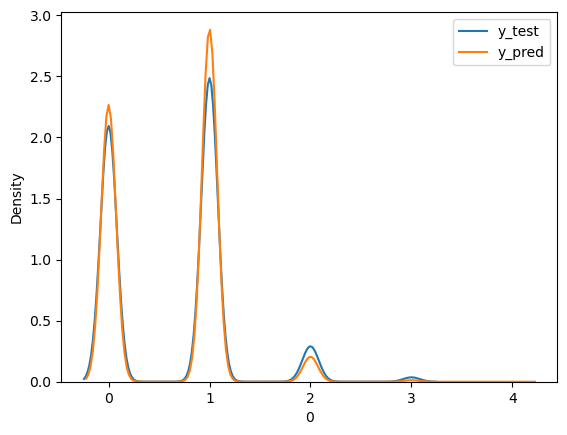

In [137]:
graph(pred_df)

In [138]:
plus(pred_df)

MSE :  0.17577259751416296 
RMSE :  0.4192524269627583 
MAE :  0.30437216154141594 
MSLE :  0.024961080159882815 
RMSLE :  0.15799075972943105


<function __main__.loss_metrics(y_true, y_pred)>

In [139]:
r2_score(y_test, y_pred4)

0.5500676720217595

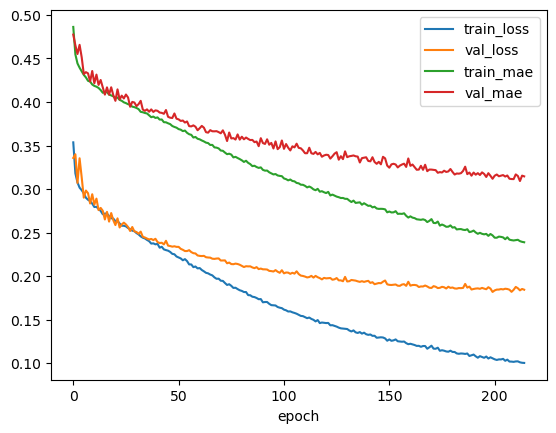

In [140]:
plt.figure()

plt.plot(history4.history["loss"], label = "train_loss")
plt.plot(history4.history["val_loss"], label = "val_loss")
plt.plot(history4.history["mae"], label = "train_mae")
plt.plot(history4.history["val_mae"], label = "val_mae")

plt.xlabel("epoch")
plt.legend()
plt.show()

# Model5

- dropout = 0.5


- optimizer = Adam (learning_rate = 0.0001)
- loss = "mse"
- epochs = 1000, batch_size = 64
- kernel_size = 3


- Conv1D(64)
- MaxPool1D(3)
- Dropout(0.5)
- Conv1D(64)
- MaxPool1D(3)
- Dropout(0.5)
- Dense(64)
- Dense(32)
- Dropout(0.5)

In [141]:
scaled_train.shape, scaled_test.shape

((40305, 951, 1), (26871, 951, 1))

In [142]:
model5 = Sequential()
model5.add(Conv1D(filters = 64, kernel_size=3, activation = "relu", padding = "same", input_shape = (951,1)))
model5.add(keras.layers.MaxPool1D(3))
model5.add(Dropout(0.5))
model5.add(Conv1D(filters = 64, kernel_size=3, activation = "relu", padding = "same"))
model5.add(keras.layers.MaxPool1D(3))
model5.add(Dropout(0.5))
model5.add(keras.layers.Flatten())
model5.add(Dense(64, activation = "relu"))
model5.add(Dense(32, activation = "relu"))
model5.add(Dropout(0.5))
model5.add(Dense(1))

In [143]:
model5.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 951, 64)           256       
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 317, 64)          0         
 g1D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 317, 64)           0         
                                                                 
 conv1d_13 (Conv1D)          (None, 317, 64)           12352     
                                                                 
 max_pooling1d_13 (MaxPoolin  (None, 105, 64)          0         
 g1D)                                                            
                                                                 
 dropout_19 (Dropout)        (None, 105, 64)          

In [145]:
checkpoint = keras.callbacks.ModelCheckpoint("./model/epoch_best_model5.h5", save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 15, restore_best_weights = True)
adam = keras.optimizers.Adam(learning_rate = 0.0001)
model5.compile(loss = "mse", optimizer = adam, metrics = ["mae"] )
history5 = model5.fit(scaled_train, y_train, validation_split = 0.2, epochs = 1000, callbacks = [early_stopping_cb, checkpoint], batch_size = 64)

Epoch 1/1000
504/504 [==============================] - 44s 86ms/step - loss: 0.3571 - mae: 0.4908 - val_loss: 0.4442 - val_mae: 0.5347
Epoch 2/1000
504/504 [==============================] - 43s 85ms/step - loss: 0.3350 - mae: 0.4694 - val_loss: 0.4122 - val_mae: 0.5174
Epoch 3/1000
504/504 [==============================] - 39s 78ms/step - loss: 0.3228 - mae: 0.4582 - val_loss: 0.4182 - val_mae: 0.5198
Epoch 4/1000
504/504 [==============================] - 37s 73ms/step - loss: 0.3147 - mae: 0.4516 - val_loss: 0.3824 - val_mae: 0.5071
Epoch 5/1000
504/504 [==============================] - 37s 73ms/step - loss: 0.3101 - mae: 0.4473 - val_loss: 0.3873 - val_mae: 0.5084
Epoch 6/1000
504/504 [==============================] - 37s 73ms/step - loss: 0.3060 - mae: 0.4426 - val_loss: 0.3585 - val_mae: 0.4931
Epoch 7/1000
504/504 [==============================] - 37s 73ms/step - loss: 0.3031 - mae: 0.4403 - val_loss: 0.3556 - val_mae: 0.4934
Epoch 8/1000
504/504 [==========================

Epoch 61/1000
504/504 [==============================] - 37s 73ms/step - loss: 0.2441 - mae: 0.3922 - val_loss: 0.2428 - val_mae: 0.3950
Epoch 62/1000
504/504 [==============================] - 35s 69ms/step - loss: 0.2412 - mae: 0.3894 - val_loss: 0.2391 - val_mae: 0.3892
Epoch 63/1000
504/504 [==============================] - 34s 68ms/step - loss: 0.2400 - mae: 0.3895 - val_loss: 0.2402 - val_mae: 0.3939
Epoch 64/1000
504/504 [==============================] - 34s 68ms/step - loss: 0.2388 - mae: 0.3884 - val_loss: 0.2380 - val_mae: 0.3887
Epoch 65/1000
504/504 [==============================] - 34s 68ms/step - loss: 0.2388 - mae: 0.3886 - val_loss: 0.2405 - val_mae: 0.3939
Epoch 66/1000
504/504 [==============================] - 35s 69ms/step - loss: 0.2389 - mae: 0.3873 - val_loss: 0.2380 - val_mae: 0.3929
Epoch 67/1000
504/504 [==============================] - 35s 68ms/step - loss: 0.2386 - mae: 0.3877 - val_loss: 0.2368 - val_mae: 0.3901
Epoch 68/1000
504/504 [==================

504/504 [==============================] - 34s 68ms/step - loss: 0.1771 - mae: 0.3316 - val_loss: 0.2040 - val_mae: 0.3522
Epoch 180/1000
504/504 [==============================] - 34s 68ms/step - loss: 0.1759 - mae: 0.3316 - val_loss: 0.2033 - val_mae: 0.3511
Epoch 181/1000
504/504 [==============================] - 34s 68ms/step - loss: 0.1755 - mae: 0.3304 - val_loss: 0.2028 - val_mae: 0.3509
Epoch 182/1000
504/504 [==============================] - 34s 68ms/step - loss: 0.1750 - mae: 0.3303 - val_loss: 0.2006 - val_mae: 0.3475
Epoch 183/1000
504/504 [==============================] - 34s 68ms/step - loss: 0.1752 - mae: 0.3293 - val_loss: 0.2015 - val_mae: 0.3504
Epoch 184/1000
504/504 [==============================] - 34s 68ms/step - loss: 0.1731 - mae: 0.3288 - val_loss: 0.2018 - val_mae: 0.3499
Epoch 185/1000
504/504 [==============================] - 34s 68ms/step - loss: 0.1738 - mae: 0.3290 - val_loss: 0.2002 - val_mae: 0.3458
Epoch 186/1000
504/504 [=========================

In [146]:
y_pred5 = model5.predict(scaled_test)

840/840 [==============================] - 5s 6ms/step


In [147]:
pred_df = pd.DataFrame(y_pred5, y_test).reset_index()

In [148]:
pred_df

,PM10_y_bin,0
0,1,1.080995
1,1,0.414213
2,1,0.761619
3,0,0.229020
4,0,0.506706
...,...,...
26866,3,1.540116
26867,1,0.908595
26868,0,0.117446
26869,1,0.589083


C:\Users\tmdwn\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\tmdwn\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


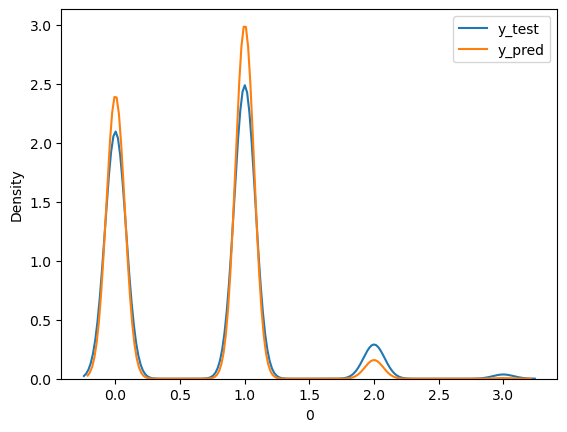

In [149]:
graph(pred_df)

In [150]:
plus(pred_df)

MSE :  0.19041451662972267 
RMSE :  0.4363651184841917 
MAE :  0.3318962534273133 
MSLE :  0.026934807108394347 
RMSLE :  0.16411827170791907


<function __main__.loss_metrics(y_true, y_pred)>

In [151]:
r2_score(y_test, y_pred5)

0.5125881510560297

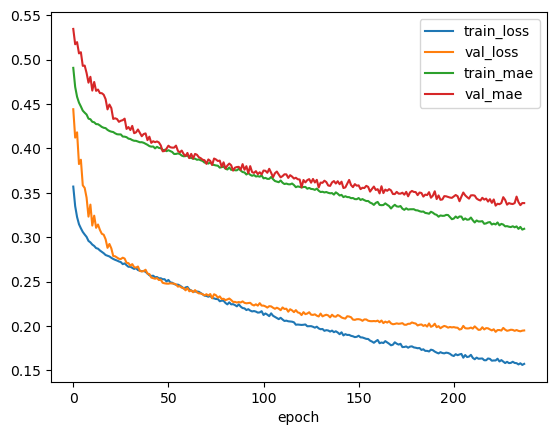

In [152]:
plt.figure()

plt.plot(history5.history["loss"], label = "train_loss")
plt.plot(history5.history["val_loss"], label = "val_loss")
plt.plot(history5.history["mae"], label = "train_mae")
plt.plot(history5.history["val_mae"], label = "val_mae")

plt.xlabel("epoch")
plt.legend()
plt.show()

- Model3( Dense층 하나 제거)의 성능이 제일 좋다

## Model별 Accuracy 확인

In [532]:
# 저장한 model 불러오기
model = keras.models.load_model("./model/epoch_best_model.h5")
model2 = keras.models.load_model("./model/epoch_best_model2.h5")
model3 = keras.models.load_model("./model/epoch_best_model3.h5")
model4 = keras.models.load_model("./model/epoch_best_model4.h5")
model5 = keras.models.load_model("./model/epoch_best_model5.h5")

In [533]:
# 모델별 예측값 
y_pred = model.predict(scaled_test)
y_pred2 = model2.predict(scaled_test)
y_pred3 = model3.predict(scaled_test)
y_pred4 = model4.predict(scaled_test)
y_pred5 = model5.predict(scaled_test)

840/840 [==============================] - 11s 13ms/step


In [534]:
# 모델별 정확도 확인
print("Model1 : ", accuracy_score(y_test, np.round(y_pred)))
print("Model2 : ", accuracy_score(y_test, np.round(y_pred2)))
print("Model3 : ", accuracy_score(y_test, np.round(y_pred3)))
print("Model4 : ", accuracy_score(y_test, np.round(y_pred4)))
print("Model5 : ", accuracy_score(y_test, np.round(y_pred5)))

Model1 :  0.7852331509806111
Model2 :  0.6983737114361207
Model3 :  0.7839678463771352
Model4 :  0.7814744520114622
Model5 :  0.7580291020058799


# Model6

- 위 변경사항 3가지 모두 적용


- optimizer = Adam (learning_rate = 0.0001)
- loss = "mse"
- epochs = 500, batch_size = 64
- kernel_size = 3


- Conv1D(64)
- MaxPool1D(3)
- Dropout(0.5)
- Conv1D(64)
- MaxPool1D(3)
- Dropout(0.5)
- Flatten()
- Dense(64)
- Dropout(0.5)
- Dense(1)


In [153]:
scaled_train.shape, scaled_test.shape

((40305, 951, 1), (26871, 951, 1))

In [154]:
model6 = Sequential()
model6.add(Conv1D(filters = 64, kernel_size=3, activation = "relu", padding = "same", input_shape = (951,1)))
model6.add(keras.layers.MaxPool1D(3))
model6.add(Dropout(0.5))
model6.add(Conv1D(filters = 64, kernel_size=3, activation = "relu", padding = "same"))
model6.add(keras.layers.MaxPool1D(3))
model6.add(Dropout(0.5))
model6.add(keras.layers.Flatten())
model6.add(Dense(64, activation = "relu"))
model6.add(Dropout(0.5))
model6.add(Dense(1))

In [155]:
model6.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_14 (Conv1D)          (None, 951, 64)           256       
                                                                 
 max_pooling1d_14 (MaxPoolin  (None, 317, 64)          0         
 g1D)                                                            
                                                                 
 dropout_21 (Dropout)        (None, 317, 64)           0         
                                                                 
 conv1d_15 (Conv1D)          (None, 317, 64)           12352     
                                                                 
 max_pooling1d_15 (MaxPoolin  (None, 105, 64)          0         
 g1D)                                                            
                                                                 
 dropout_22 (Dropout)        (None, 105, 64)          

In [156]:
checkpoint = keras.callbacks.ModelCheckpoint("./model/epoch_best_model6.h5", save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 15, restore_best_weights = True)
adam = keras.optimizers.Adam(learning_rate = 0.0001)
model6.compile(loss = "mse", optimizer = adam, metrics = ["mae"] )
history6 = model6.fit(scaled_train, y_train, validation_split = 0.2, epochs = 500, callbacks = [early_stopping_cb, checkpoint], batch_size = 64)

Epoch 1/500
504/504 [==============================] - 36s 69ms/step - loss: 0.3414 - mae: 0.4844 - val_loss: 0.4783 - val_mae: 0.5415
Epoch 2/500
504/504 [==============================] - 35s 70ms/step - loss: 0.3141 - mae: 0.4582 - val_loss: 0.4537 - val_mae: 0.5340
Epoch 3/500
504/504 [==============================] - 35s 70ms/step - loss: 0.3057 - mae: 0.4478 - val_loss: 0.4596 - val_mae: 0.5317
Epoch 4/500
504/504 [==============================] - 35s 70ms/step - loss: 0.3025 - mae: 0.4439 - val_loss: 0.4067 - val_mae: 0.5166
Epoch 5/500
504/504 [==============================] - 35s 70ms/step - loss: 0.3007 - mae: 0.4407 - val_loss: 0.4416 - val_mae: 0.5258
Epoch 6/500
504/504 [==============================] - 35s 70ms/step - loss: 0.2943 - mae: 0.4352 - val_loss: 0.4248 - val_mae: 0.5214
Epoch 7/500
504/504 [==============================] - 35s 70ms/step - loss: 0.2947 - mae: 0.4344 - val_loss: 0.3994 - val_mae: 0.5094
Epoch 8/500
504/504 [==============================] - 

504/504 [==============================] - 35s 69ms/step - loss: 0.2325 - mae: 0.3819 - val_loss: 0.2332 - val_mae: 0.3847
Epoch 122/500
504/504 [==============================] - 35s 70ms/step - loss: 0.2314 - mae: 0.3795 - val_loss: 0.2342 - val_mae: 0.3850
Epoch 123/500
504/504 [==============================] - 35s 69ms/step - loss: 0.2316 - mae: 0.3812 - val_loss: 0.2362 - val_mae: 0.3894
Epoch 124/500
504/504 [==============================] - 35s 70ms/step - loss: 0.2323 - mae: 0.3814 - val_loss: 0.2324 - val_mae: 0.3827
Epoch 125/500
504/504 [==============================] - 35s 69ms/step - loss: 0.2301 - mae: 0.3793 - val_loss: 0.2325 - val_mae: 0.3836
Epoch 126/500
504/504 [==============================] - 35s 69ms/step - loss: 0.2304 - mae: 0.3793 - val_loss: 0.2322 - val_mae: 0.3846
Epoch 127/500
504/504 [==============================] - 35s 69ms/step - loss: 0.2313 - mae: 0.3805 - val_loss: 0.2329 - val_mae: 0.3847
Epoch 128/500
504/504 [==============================] 

Epoch 181/500
504/504 [==============================] - 35s 69ms/step - loss: 0.2145 - mae: 0.3658 - val_loss: 0.2175 - val_mae: 0.3710
Epoch 182/500
504/504 [==============================] - 35s 69ms/step - loss: 0.2134 - mae: 0.3664 - val_loss: 0.2202 - val_mae: 0.3729
Epoch 183/500
504/504 [==============================] - 35s 69ms/step - loss: 0.2108 - mae: 0.3628 - val_loss: 0.2164 - val_mae: 0.3677
Epoch 184/500
504/504 [==============================] - 35s 69ms/step - loss: 0.2128 - mae: 0.3653 - val_loss: 0.2175 - val_mae: 0.3700
Epoch 185/500
504/504 [==============================] - 35s 70ms/step - loss: 0.2117 - mae: 0.3641 - val_loss: 0.2172 - val_mae: 0.3678
Epoch 186/500
504/504 [==============================] - 35s 70ms/step - loss: 0.2108 - mae: 0.3632 - val_loss: 0.2199 - val_mae: 0.3714
Epoch 187/500
504/504 [==============================] - 35s 69ms/step - loss: 0.2113 - mae: 0.3645 - val_loss: 0.2207 - val_mae: 0.3754
Epoch 188/500
504/504 [==================

Epoch 241/500
504/504 [==============================] - 35s 69ms/step - loss: 0.2005 - mae: 0.3539 - val_loss: 0.2086 - val_mae: 0.3632
Epoch 242/500
504/504 [==============================] - 35s 70ms/step - loss: 0.1996 - mae: 0.3539 - val_loss: 0.2077 - val_mae: 0.3586
Epoch 243/500
504/504 [==============================] - 35s 70ms/step - loss: 0.1961 - mae: 0.3510 - val_loss: 0.2077 - val_mae: 0.3606
Epoch 244/500
504/504 [==============================] - 35s 69ms/step - loss: 0.1973 - mae: 0.3517 - val_loss: 0.2072 - val_mae: 0.3606
Epoch 245/500
504/504 [==============================] - 35s 69ms/step - loss: 0.1966 - mae: 0.3510 - val_loss: 0.2067 - val_mae: 0.3576
Epoch 246/500
504/504 [==============================] - 35s 70ms/step - loss: 0.1962 - mae: 0.3515 - val_loss: 0.2070 - val_mae: 0.3616
Epoch 247/500
504/504 [==============================] - 35s 70ms/step - loss: 0.1986 - mae: 0.3528 - val_loss: 0.2068 - val_mae: 0.3589
Epoch 248/500
504/504 [==================

Epoch 301/500
504/504 [==============================] - 35s 69ms/step - loss: 0.1885 - mae: 0.3451 - val_loss: 0.2031 - val_mae: 0.3579
Epoch 302/500
504/504 [==============================] - 35s 70ms/step - loss: 0.1880 - mae: 0.3442 - val_loss: 0.1998 - val_mae: 0.3525
Epoch 303/500
504/504 [==============================] - 35s 69ms/step - loss: 0.1887 - mae: 0.3443 - val_loss: 0.2010 - val_mae: 0.3538
Epoch 304/500
504/504 [==============================] - 35s 69ms/step - loss: 0.1881 - mae: 0.3440 - val_loss: 0.1998 - val_mae: 0.3520
Epoch 305/500
504/504 [==============================] - 35s 69ms/step - loss: 0.1889 - mae: 0.3438 - val_loss: 0.2011 - val_mae: 0.3532
Epoch 306/500
504/504 [==============================] - 35s 69ms/step - loss: 0.1859 - mae: 0.3419 - val_loss: 0.2007 - val_mae: 0.3530
Epoch 307/500
504/504 [==============================] - 35s 69ms/step - loss: 0.1864 - mae: 0.3428 - val_loss: 0.1988 - val_mae: 0.3493
Epoch 308/500
504/504 [==================

In [157]:
y_pred6 = model6.predict(scaled_test)

840/840 [==============================] - 5s 6ms/step


In [158]:
pred_df = pd.DataFrame(y_pred6, y_test).reset_index()

In [159]:
pred_df

,PM10_y_bin,0
0,1,1.058064
1,1,0.349493
2,1,0.686850
3,0,0.455477
4,0,0.599524
...,...,...
26866,3,1.715715
26867,1,0.805121
26868,0,0.117617
26869,1,0.477132


C:\Users\tmdwn\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\tmdwn\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


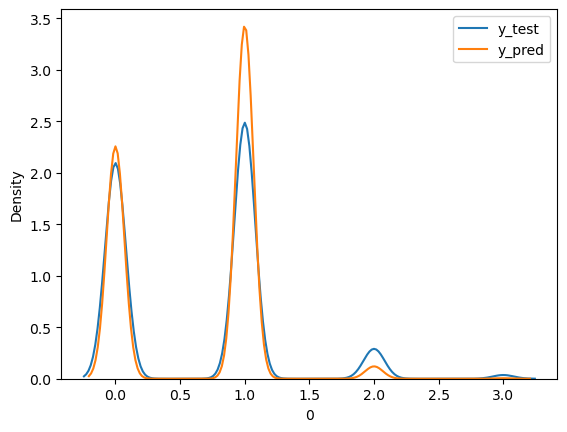

In [160]:
graph(pred_df)

In [161]:
plus(pred_df)

MSE :  0.1900104860003398 
RMSE :  0.4359019224554301 
MAE :  0.3406941225673697 
MSLE :  0.027030051151893476 
RMSLE :  0.1644081845648004


<function __main__.loss_metrics(y_true, y_pred)>

In [162]:
r2_score(y_test, y_pred6)

0.5136223648312348

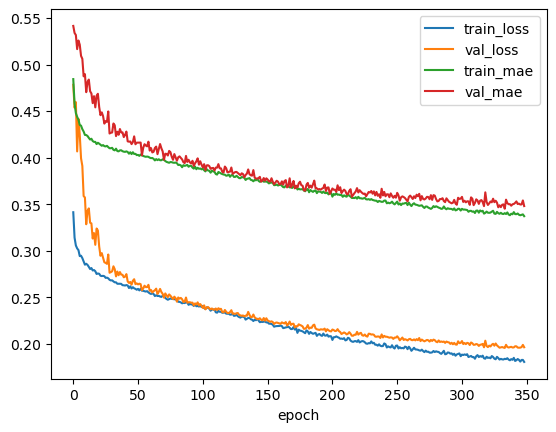

In [165]:
plt.figure()

plt.plot(history6.history["loss"], label = "train_loss")
plt.plot(history6.history["val_loss"], label = "val_loss")
plt.plot(history6.history["mae"], label = "train_mae")
plt.plot(history6.history["val_mae"], label = "val_mae")

plt.xlabel("epoch")
plt.legend()
plt.show()

- 다 적용한 결과 그래프에서 과적합은 줄어들었지만 성능지표는 더 좋지 않다

# Model7

- 가장 성능지표가 좋은 모델(Model3)에서 맥스풀링 대신 stride를 사용
    - 최근에는 maxpooling보다 stride를 적용한 모델을 많이 사용한다고 함.


- optimizer = Adam (learning_rate = 0.0001)
- loss = "mse"
- epochs = 1000, batch_size = 64
- kernel_size = 3
- strides = 3

- Conv1D(64)
- Dropout(0.3)
- Conv1D(64)
- Dropout(0.3)
- Dense(64)
- Dropout(0.3)

In [173]:
scaled_train.shape, scaled_test.shape

((40305, 951, 1), (26871, 951, 1))

In [174]:
model7 = Sequential()
model7.add(Conv1D(filters = 64, kernel_size=3, activation = "relu", padding = "same", strides = 3, input_shape = (951,1)))
model7.add(Dropout(0.3))
model7.add(Conv1D(filters = 64, kernel_size=3, activation = "relu", padding = "same", strides = 3))
model7.add(Dropout(0.3))
model7.add(keras.layers.Flatten())
model7.add(Dense(64, activation = "relu"))
model7.add(Dropout(0.3))
model7.add(Dense(1))

In [175]:
model7.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_20 (Conv1D)          (None, 317, 64)           256       
                                                                 
 dropout_30 (Dropout)        (None, 317, 64)           0         
                                                                 
 conv1d_21 (Conv1D)          (None, 106, 64)           12352     
                                                                 
 dropout_31 (Dropout)        (None, 106, 64)           0         
                                                                 
 flatten_10 (Flatten)        (None, 6784)              0         
                                                                 
 dense_26 (Dense)            (None, 64)                434240    
                                                                 
 dropout_32 (Dropout)        (None, 64)              

In [176]:
checkpoint = keras.callbacks.ModelCheckpoint("./model/epoch_best_model7.h5", save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 15, restore_best_weights = True)
adam = keras.optimizers.Adam(learning_rate = 0.0001)
model7.compile(loss = "mse", optimizer = adam, metrics = ["mae"] )
history7 = model7.fit(scaled_train, y_train, validation_split = 0.2, epochs = 1000, callbacks = [early_stopping_cb, checkpoint], batch_size = 64)

Epoch 1/1000
504/504 [==============================] - 21s 40ms/step - loss: 0.3051 - mae: 0.4508 - val_loss: 0.2821 - val_mae: 0.4240
Epoch 2/1000
504/504 [==============================] - 18s 36ms/step - loss: 0.2813 - mae: 0.4229 - val_loss: 0.2768 - val_mae: 0.4152
Epoch 3/1000
504/504 [==============================] - 18s 36ms/step - loss: 0.2781 - mae: 0.4184 - val_loss: 0.2741 - val_mae: 0.4093
Epoch 4/1000
504/504 [==============================] - 18s 37ms/step - loss: 0.2733 - mae: 0.4128 - val_loss: 0.2693 - val_mae: 0.4097
Epoch 5/1000
504/504 [==============================] - 19s 37ms/step - loss: 0.2716 - mae: 0.4112 - val_loss: 0.2705 - val_mae: 0.4055
Epoch 6/1000
504/504 [==============================] - 18s 36ms/step - loss: 0.2695 - mae: 0.4091 - val_loss: 0.2685 - val_mae: 0.4055
Epoch 7/1000
504/504 [==============================] - 20s 39ms/step - loss: 0.2673 - mae: 0.4074 - val_loss: 0.2756 - val_mae: 0.4148
Epoch 8/1000
504/504 [==========================

Epoch 61/1000
504/504 [==============================] - 17s 35ms/step - loss: 0.2114 - mae: 0.3607 - val_loss: 0.2206 - val_mae: 0.3677
Epoch 62/1000
504/504 [==============================] - 17s 35ms/step - loss: 0.2110 - mae: 0.3603 - val_loss: 0.2198 - val_mae: 0.3684
Epoch 63/1000
504/504 [==============================] - 17s 34ms/step - loss: 0.2093 - mae: 0.3588 - val_loss: 0.2173 - val_mae: 0.3629
Epoch 64/1000
504/504 [==============================] - 17s 34ms/step - loss: 0.2085 - mae: 0.3581 - val_loss: 0.2183 - val_mae: 0.3621
Epoch 65/1000
504/504 [==============================] - 17s 35ms/step - loss: 0.2085 - mae: 0.3578 - val_loss: 0.2162 - val_mae: 0.3636
Epoch 66/1000
504/504 [==============================] - 17s 35ms/step - loss: 0.2072 - mae: 0.3577 - val_loss: 0.2151 - val_mae: 0.3631
Epoch 67/1000
504/504 [==============================] - 17s 34ms/step - loss: 0.2062 - mae: 0.3557 - val_loss: 0.2159 - val_mae: 0.3649
Epoch 68/1000
504/504 [==================

504/504 [==============================] - 17s 35ms/step - loss: 0.1429 - mae: 0.2965 - val_loss: 0.1751 - val_mae: 0.3272
Epoch 180/1000
504/504 [==============================] - 17s 35ms/step - loss: 0.1426 - mae: 0.2951 - val_loss: 0.1771 - val_mae: 0.3279
Epoch 181/1000
504/504 [==============================] - 17s 35ms/step - loss: 0.1409 - mae: 0.2943 - val_loss: 0.1741 - val_mae: 0.3221
Epoch 182/1000
504/504 [==============================] - 17s 35ms/step - loss: 0.1415 - mae: 0.2961 - val_loss: 0.1741 - val_mae: 0.3246
Epoch 183/1000
504/504 [==============================] - 18s 35ms/step - loss: 0.1411 - mae: 0.2943 - val_loss: 0.1740 - val_mae: 0.3255
Epoch 184/1000
504/504 [==============================] - 18s 35ms/step - loss: 0.1415 - mae: 0.2950 - val_loss: 0.1743 - val_mae: 0.3218
Epoch 185/1000
504/504 [==============================] - 17s 35ms/step - loss: 0.1419 - mae: 0.2952 - val_loss: 0.1745 - val_mae: 0.3261
Epoch 186/1000
504/504 [=========================

504/504 [==============================] - 18s 35ms/step - loss: 0.1156 - mae: 0.2665 - val_loss: 0.1606 - val_mae: 0.3061
Epoch 298/1000
504/504 [==============================] - 18s 35ms/step - loss: 0.1177 - mae: 0.2679 - val_loss: 0.1636 - val_mae: 0.3130
Epoch 299/1000
504/504 [==============================] - 18s 35ms/step - loss: 0.1165 - mae: 0.2678 - val_loss: 0.1608 - val_mae: 0.3062
Epoch 300/1000
504/504 [==============================] - 18s 35ms/step - loss: 0.1151 - mae: 0.2657 - val_loss: 0.1628 - val_mae: 0.3118
Epoch 301/1000
504/504 [==============================] - 18s 35ms/step - loss: 0.1149 - mae: 0.2652 - val_loss: 0.1604 - val_mae: 0.3059
Epoch 302/1000
504/504 [==============================] - 18s 35ms/step - loss: 0.1146 - mae: 0.2660 - val_loss: 0.1607 - val_mae: 0.3063
Epoch 303/1000
504/504 [==============================] - 18s 35ms/step - loss: 0.1154 - mae: 0.2657 - val_loss: 0.1606 - val_mae: 0.3080
Epoch 304/1000
504/504 [=========================

In [271]:
y_pred7 = model7.predict(scaled_test)

840/840 [==============================] - 3s 3ms/step


In [272]:
pred_df = pd.DataFrame(y_pred7, y_test).reset_index()

In [273]:
pred_df

,PM10_y_bin,0
0,1,1.084548
1,1,0.449097
2,1,0.705183
3,0,0.213819
4,0,0.320382
...,...,...
26866,3,1.913294
26867,1,0.670365
26868,0,0.020921
26869,1,0.513223


C:\Users\tmdwn\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\tmdwn\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


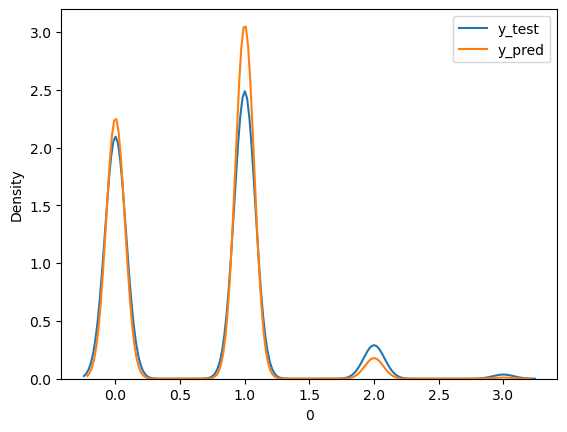

In [274]:
graph(pred_df)

In [275]:
plus(pred_df)

MSE :  0.15801704476656747 
RMSE :  0.3975135780908213 
MAE :  0.30210256777671324 
MSLE :  0.022513582826008974 
RMSLE :  0.1500452692556782


<function __main__.loss_metrics(y_true, y_pred)>

In [276]:
r2_score(y_test, y_pred7)

0.5955172887154105

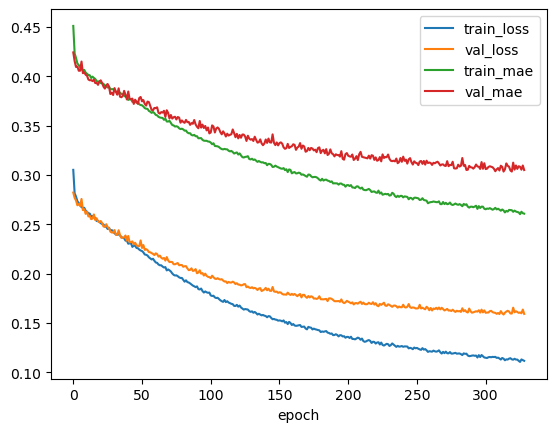

In [183]:
plt.figure()

plt.plot(history7.history["loss"], label = "train_loss")
plt.plot(history7.history["val_loss"], label = "val_loss")
plt.plot(history7.history["mae"], label = "train_mae")
plt.plot(history7.history["val_mae"], label = "val_mae")

plt.xlabel("epoch")
plt.legend()
plt.show()

# Model8

- 피처를 줄일 수 있도록 Maxpooling을 4로 변경
    - 과적합이 일어나는 원인 중 하나로 피처 수가 너무 많을 경우 라고 한다.
    
    
- optimizer = Adam (learning_rate = 0.0001)
- loss = "mse"
- epochs = 1000, batch_size = 64
- kernel_size = 3


- Conv1D(64)
- MaxPool1D(4)
- Dropout(0.3)
- Conv1D(64)
- MaxPool1D(4)
- Dropout(0.3)
- Dense(64)
- Dropout(0.3)

In [184]:
scaled_train.shape, scaled_test.shape

((40305, 951, 1), (26871, 951, 1))

In [185]:
model8 = Sequential()
model8.add(Conv1D(filters = 64, kernel_size=3, activation = "relu", padding = "same", input_shape = (951,1)))
model8.add(keras.layers.MaxPool1D(4))
model8.add(Dropout(0.3))
model8.add(Conv1D(filters = 64, kernel_size=3, activation = "relu", padding = "same"))
model8.add(keras.layers.MaxPool1D(4))
model8.add(Dropout(0.3))
model8.add(keras.layers.Flatten())
model8.add(Dense(64, activation = "relu"))
model8.add(Dropout(0.3))
model8.add(Dense(1))

In [186]:
model8.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_22 (Conv1D)          (None, 951, 64)           256       
                                                                 
 max_pooling1d_20 (MaxPoolin  (None, 237, 64)          0         
 g1D)                                                            
                                                                 
 dropout_33 (Dropout)        (None, 237, 64)           0         
                                                                 
 conv1d_23 (Conv1D)          (None, 237, 64)           12352     
                                                                 
 max_pooling1d_21 (MaxPoolin  (None, 59, 64)           0         
 g1D)                                                            
                                                                 
 dropout_34 (Dropout)        (None, 59, 64)          

In [187]:
checkpoint = keras.callbacks.ModelCheckpoint("./model/epoch_best_model8.h5", save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 15, restore_best_weights = True)
adam = keras.optimizers.Adam(learning_rate = 0.0001)
model8.compile(loss = "mse", optimizer = adam, metrics = ["mae"] )
history8 = model8.fit(scaled_train, y_train, validation_split = 0.2, epochs = 1000, callbacks = [early_stopping_cb, checkpoint], batch_size = 64)

Epoch 1/1000
504/504 [==============================] - 27s 53ms/step - loss: 0.3282 - mae: 0.4757 - val_loss: 0.3783 - val_mae: 0.4912
Epoch 2/1000
504/504 [==============================] - 27s 53ms/step - loss: 0.3004 - mae: 0.4441 - val_loss: 0.3642 - val_mae: 0.4818
Epoch 3/1000
504/504 [==============================] - 27s 53ms/step - loss: 0.2941 - mae: 0.4349 - val_loss: 0.3680 - val_mae: 0.4773
Epoch 4/1000
504/504 [==============================] - 27s 53ms/step - loss: 0.2905 - mae: 0.4302 - val_loss: 0.3719 - val_mae: 0.4814
Epoch 5/1000
504/504 [==============================] - 27s 53ms/step - loss: 0.2877 - mae: 0.4266 - val_loss: 0.3760 - val_mae: 0.4817
Epoch 6/1000
504/504 [==============================] - 27s 53ms/step - loss: 0.2842 - mae: 0.4232 - val_loss: 0.3466 - val_mae: 0.4658
Epoch 7/1000
504/504 [==============================] - 27s 53ms/step - loss: 0.2825 - mae: 0.4209 - val_loss: 0.3397 - val_mae: 0.4620
Epoch 8/1000
504/504 [==========================

Epoch 61/1000
504/504 [==============================] - 27s 54ms/step - loss: 0.2465 - mae: 0.3906 - val_loss: 0.2523 - val_mae: 0.3971
Epoch 62/1000
504/504 [==============================] - 27s 54ms/step - loss: 0.2445 - mae: 0.3887 - val_loss: 0.2512 - val_mae: 0.3952
Epoch 63/1000
504/504 [==============================] - 27s 54ms/step - loss: 0.2424 - mae: 0.3866 - val_loss: 0.2467 - val_mae: 0.3874
Epoch 64/1000
504/504 [==============================] - 27s 54ms/step - loss: 0.2440 - mae: 0.3882 - val_loss: 0.2452 - val_mae: 0.3906
Epoch 65/1000
504/504 [==============================] - 27s 54ms/step - loss: 0.2430 - mae: 0.3874 - val_loss: 0.2470 - val_mae: 0.3936
Epoch 66/1000
504/504 [==============================] - 27s 54ms/step - loss: 0.2412 - mae: 0.3865 - val_loss: 0.2443 - val_mae: 0.3895
Epoch 67/1000
504/504 [==============================] - 27s 54ms/step - loss: 0.2418 - mae: 0.3862 - val_loss: 0.2471 - val_mae: 0.3926
Epoch 68/1000
504/504 [==================

504/504 [==============================] - 28s 55ms/step - loss: 0.1856 - mae: 0.3388 - val_loss: 0.2057 - val_mae: 0.3552
Epoch 180/1000
504/504 [==============================] - 28s 55ms/step - loss: 0.1858 - mae: 0.3394 - val_loss: 0.2062 - val_mae: 0.3543
Epoch 181/1000
504/504 [==============================] - 28s 55ms/step - loss: 0.1862 - mae: 0.3395 - val_loss: 0.2068 - val_mae: 0.3589
Epoch 182/1000
504/504 [==============================] - 28s 55ms/step - loss: 0.1864 - mae: 0.3390 - val_loss: 0.2057 - val_mae: 0.3577
Epoch 183/1000
504/504 [==============================] - 28s 56ms/step - loss: 0.1859 - mae: 0.3388 - val_loss: 0.2051 - val_mae: 0.3584
Epoch 184/1000
504/504 [==============================] - 28s 55ms/step - loss: 0.1857 - mae: 0.3383 - val_loss: 0.2050 - val_mae: 0.3574
Epoch 185/1000
504/504 [==============================] - 28s 56ms/step - loss: 0.1855 - mae: 0.3382 - val_loss: 0.2047 - val_mae: 0.3571
Epoch 186/1000
504/504 [=========================

504/504 [==============================] - 27s 54ms/step - loss: 0.1536 - mae: 0.3079 - val_loss: 0.1868 - val_mae: 0.3357
Epoch 298/1000
504/504 [==============================] - 28s 55ms/step - loss: 0.1530 - mae: 0.3074 - val_loss: 0.1880 - val_mae: 0.3374
Epoch 299/1000
504/504 [==============================] - 31s 61ms/step - loss: 0.1534 - mae: 0.3074 - val_loss: 0.1883 - val_mae: 0.3390
Epoch 300/1000
504/504 [==============================] - 29s 57ms/step - loss: 0.1532 - mae: 0.3084 - val_loss: 0.1880 - val_mae: 0.3391
Epoch 301/1000
504/504 [==============================] - 28s 56ms/step - loss: 0.1531 - mae: 0.3092 - val_loss: 0.1886 - val_mae: 0.3400
Epoch 302/1000
504/504 [==============================] - 28s 55ms/step - loss: 0.1534 - mae: 0.3084 - val_loss: 0.1867 - val_mae: 0.3380
Epoch 303/1000
504/504 [==============================] - 27s 54ms/step - loss: 0.1534 - mae: 0.3081 - val_loss: 0.1879 - val_mae: 0.3357
Epoch 304/1000
504/504 [=========================

504/504 [==============================] - 28s 56ms/step - loss: 0.1390 - mae: 0.2920 - val_loss: 0.1797 - val_mae: 0.3278
Epoch 416/1000
504/504 [==============================] - 28s 56ms/step - loss: 0.1356 - mae: 0.2884 - val_loss: 0.1811 - val_mae: 0.3303
Epoch 417/1000
504/504 [==============================] - 28s 56ms/step - loss: 0.1352 - mae: 0.2892 - val_loss: 0.1791 - val_mae: 0.3272
Epoch 418/1000
504/504 [==============================] - 28s 55ms/step - loss: 0.1357 - mae: 0.2891 - val_loss: 0.1800 - val_mae: 0.3279
Epoch 419/1000
504/504 [==============================] - 28s 55ms/step - loss: 0.1353 - mae: 0.2885 - val_loss: 0.1813 - val_mae: 0.3273
Epoch 420/1000
504/504 [==============================] - 28s 56ms/step - loss: 0.1354 - mae: 0.2889 - val_loss: 0.1784 - val_mae: 0.3293
Epoch 421/1000
504/504 [==============================] - 27s 54ms/step - loss: 0.1346 - mae: 0.2878 - val_loss: 0.1786 - val_mae: 0.3307
Epoch 422/1000
504/504 [=========================

In [188]:
y_pred8 = model8.predict(scaled_test)

840/840 [==============================] - 5s 6ms/step


In [189]:
pred_df = pd.DataFrame(y_pred8, y_test).reset_index()

In [190]:
pred_df

,PM10_y_bin,0
0,1,1.101063
1,1,0.500614
2,1,0.757330
3,0,0.593797
4,0,0.512979
...,...,...
26866,3,2.636254
26867,1,0.807487
26868,0,0.030964
26869,1,0.533108


C:\Users\tmdwn\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\tmdwn\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


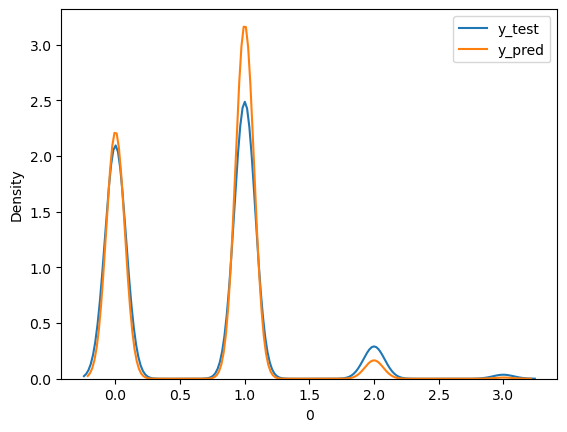

In [191]:
graph(pred_df)

In [192]:
plus(pred_df)

MSE :  0.17586731287407653 
RMSE :  0.41936536918786765 
MAE :  0.3240353906020655 
MSLE :  0.025093950530980937 
RMSLE :  0.15841070207211677


<function __main__.loss_metrics(y_true, y_pred)>

In [193]:
r2_score(y_test, y_pred8)

0.5498252252298028

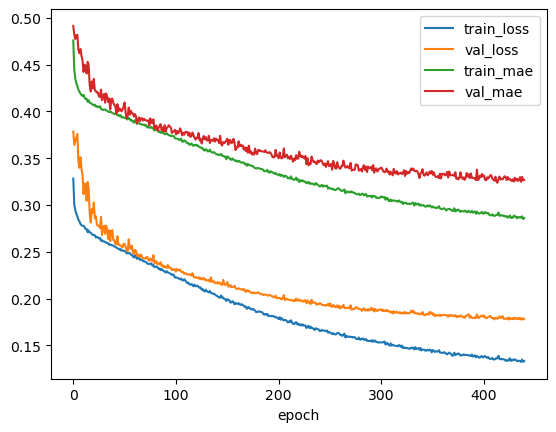

In [194]:
plt.figure()

plt.plot(history8.history["loss"], label = "train_loss")
plt.plot(history8.history["val_loss"], label = "val_loss")
plt.plot(history8.history["mae"], label = "train_mae")
plt.plot(history8.history["val_mae"], label = "val_mae")

plt.xlabel("epoch")
plt.legend()
plt.show()

# Model9

- 모델을 좀 더 간소화해보자
    - Conv1D 1개 제거


- optimizer = Adam (learning_rate = 0.0001)
- loss = "mse"
- epochs = 1000, batch_size = 64
- kernel_size = 3


- Conv1D(64)
- MaxPool1D(3)
- Dropout(0.3)
- Dense(64)
- Dropout(0.3)

In [195]:
scaled_train.shape, scaled_test.shape

((40305, 951, 1), (26871, 951, 1))

In [196]:
model9 = Sequential()
model9.add(Conv1D(filters = 64, kernel_size=3, activation = "relu", padding = "same", input_shape = (951,1)))
model9.add(keras.layers.MaxPool1D(3))
model9.add(Dropout(0.3))
model9.add(keras.layers.Flatten())
model9.add(Dense(64, activation = "relu"))
model9.add(Dropout(0.3))
model9.add(Dense(1))

In [197]:
model9.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_24 (Conv1D)          (None, 951, 64)           256       
                                                                 
 max_pooling1d_22 (MaxPoolin  (None, 317, 64)          0         
 g1D)                                                            
                                                                 
 dropout_36 (Dropout)        (None, 317, 64)           0         
                                                                 
 flatten_12 (Flatten)        (None, 20288)             0         
                                                                 
 dense_30 (Dense)            (None, 64)                1298496   
                                                                 
 dropout_37 (Dropout)        (None, 64)                0         
                                                     

In [198]:
checkpoint = keras.callbacks.ModelCheckpoint("./model/epoch_best_model9.h5", save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 15, restore_best_weights = True)
adam = keras.optimizers.Adam(learning_rate = 0.0001)
model9.compile(loss = "mse", optimizer = adam, metrics = ["mae"] )
history9 = model9.fit(scaled_train, y_train, validation_split = 0.2, epochs = 1000, callbacks = [early_stopping_cb, checkpoint], batch_size = 64)

Epoch 1/1000
504/504 [==============================] - 28s 55ms/step - loss: 0.2967 - mae: 0.4412 - val_loss: 0.2739 - val_mae: 0.4187
Epoch 2/1000
504/504 [==============================] - 28s 55ms/step - loss: 0.2757 - mae: 0.4184 - val_loss: 0.2825 - val_mae: 0.4232
Epoch 3/1000
504/504 [==============================] - 28s 56ms/step - loss: 0.2702 - mae: 0.4116 - val_loss: 0.2638 - val_mae: 0.4057
Epoch 4/1000
504/504 [==============================] - 28s 55ms/step - loss: 0.2647 - mae: 0.4058 - val_loss: 0.2762 - val_mae: 0.4158
Epoch 5/1000
504/504 [==============================] - 28s 55ms/step - loss: 0.2644 - mae: 0.4046 - val_loss: 0.2605 - val_mae: 0.4024
Epoch 6/1000
504/504 [==============================] - 28s 55ms/step - loss: 0.2610 - mae: 0.4018 - val_loss: 0.2583 - val_mae: 0.4007
Epoch 7/1000
504/504 [==============================] - 28s 55ms/step - loss: 0.2599 - mae: 0.4012 - val_loss: 0.2573 - val_mae: 0.4005
Epoch 8/1000
504/504 [==========================

Epoch 61/1000
504/504 [==============================] - 28s 56ms/step - loss: 0.2095 - mae: 0.3624 - val_loss: 0.2207 - val_mae: 0.3676
Epoch 62/1000
504/504 [==============================] - 28s 55ms/step - loss: 0.2095 - mae: 0.3619 - val_loss: 0.2207 - val_mae: 0.3683
Epoch 63/1000
504/504 [==============================] - 28s 55ms/step - loss: 0.2086 - mae: 0.3608 - val_loss: 0.2216 - val_mae: 0.3692
Epoch 64/1000
504/504 [==============================] - 28s 56ms/step - loss: 0.2069 - mae: 0.3601 - val_loss: 0.2325 - val_mae: 0.3825
Epoch 65/1000
504/504 [==============================] - 28s 56ms/step - loss: 0.2069 - mae: 0.3601 - val_loss: 0.2241 - val_mae: 0.3723
Epoch 66/1000
504/504 [==============================] - 28s 55ms/step - loss: 0.2065 - mae: 0.3598 - val_loss: 0.2228 - val_mae: 0.3734
Epoch 67/1000
504/504 [==============================] - 28s 55ms/step - loss: 0.2054 - mae: 0.3595 - val_loss: 0.2208 - val_mae: 0.3729
Epoch 68/1000
504/504 [==================

504/504 [==============================] - 28s 55ms/step - loss: 0.1569 - mae: 0.3153 - val_loss: 0.1935 - val_mae: 0.3476
Epoch 180/1000
504/504 [==============================] - 28s 55ms/step - loss: 0.1572 - mae: 0.3149 - val_loss: 0.1904 - val_mae: 0.3415
Epoch 181/1000
504/504 [==============================] - 28s 56ms/step - loss: 0.1559 - mae: 0.3140 - val_loss: 0.1925 - val_mae: 0.3487
Epoch 182/1000
504/504 [==============================] - 28s 55ms/step - loss: 0.1586 - mae: 0.3158 - val_loss: 0.1983 - val_mae: 0.3480
Epoch 183/1000
504/504 [==============================] - 28s 56ms/step - loss: 0.1570 - mae: 0.3147 - val_loss: 0.1909 - val_mae: 0.3448
Epoch 184/1000
504/504 [==============================] - 28s 55ms/step - loss: 0.1586 - mae: 0.3170 - val_loss: 0.1939 - val_mae: 0.3498
Epoch 185/1000
504/504 [==============================] - 28s 55ms/step - loss: 0.1563 - mae: 0.3138 - val_loss: 0.1937 - val_mae: 0.3501
Epoch 186/1000
504/504 [=========================

In [199]:
y_pred9 = model9.predict(scaled_test)

840/840 [==============================] - 5s 5ms/step


In [200]:
pred_df = pd.DataFrame(y_pred9, y_test).reset_index()

In [201]:
pred_df

,PM10_y_bin,0
0,1,0.875372
1,1,0.351485
2,1,0.758634
3,0,0.467358
4,0,0.421728
...,...,...
26866,3,1.898939
26867,1,0.644732
26868,0,-0.045302
26869,1,0.486738


C:\Users\tmdwn\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\tmdwn\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


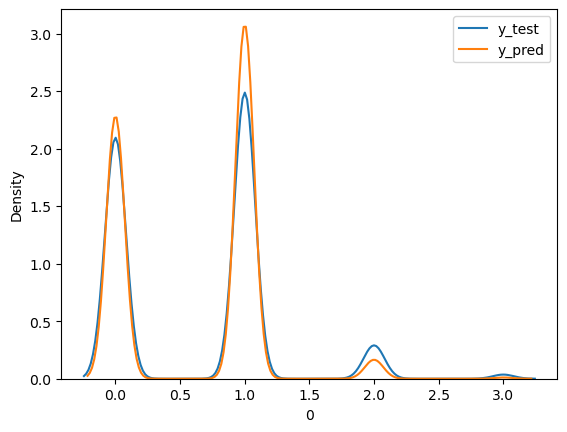

In [202]:
graph(pred_df)

In [203]:
plus(pred_df)

MSE :  0.18226959530510592 
RMSE :  0.4269304338005267 
MAE :  0.33489417975717084 
MSLE :  0.025856032542431566 
RMSLE :  0.1607981111283076


<function __main__.loss_metrics(y_true, y_pred)>

In [204]:
r2_score(y_test, y_pred9)

0.5334370402720472

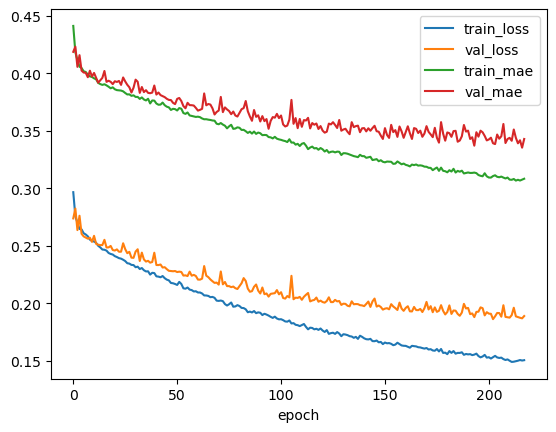

In [205]:
plt.figure()

plt.plot(history9.history["loss"], label = "train_loss")
plt.plot(history9.history["val_loss"], label = "val_loss")
plt.plot(history9.history["mae"], label = "train_mae")
plt.plot(history9.history["val_mae"], label = "val_mae")

plt.xlabel("epoch")
plt.legend()
plt.show()

- 과대적합의 시점이 더 빨라졌으며 성능도 더 안좋아졌다.

# Model10

- batch size 32
    - batch size를 작게 하는 경우에 sample의 수가 적어 training set 통계값을 부정확하게 계산합니다. 이 경우에 noise가 많아 모델의 불안정한 convergence를 유발합니다. 하지만 학습을 방해하는 약간의 noise는 overfitting을 방지하여 모델의 성능을 향상시키는 계기가 될 수 있습니다.
- https://inhovation97.tistory.com/32

    
- optimizer = Adam (learning_rate = 0.0001)
- loss = "mse"
- epochs = 1000, batch_size = 32
- kernel_size = 3


- Conv1D(64)
- MaxPool1D(3)
- Dropout(0.3)
- Conv1D(64)
- MaxPool1D(3)
- Dropout(0.3)
- Dense(64)
- Dropout(0.3)

In [206]:
scaled_train.shape, scaled_test.shape

((40305, 951, 1), (26871, 951, 1))

In [207]:
model10 = Sequential()
model10.add(Conv1D(filters = 64, kernel_size=3, activation = "relu", padding = "same", input_shape = (951,1)))
model10.add(keras.layers.MaxPool1D(3))
model10.add(Dropout(0.3))
model10.add(Conv1D(filters = 64, kernel_size=3, activation = "relu", padding = "same"))
model10.add(keras.layers.MaxPool1D(3))
model10.add(Dropout(0.3))
model10.add(keras.layers.Flatten())
model10.add(Dense(64, activation = "relu"))
model10.add(Dropout(0.3))
model10.add(Dense(1))

In [208]:
model10.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_25 (Conv1D)          (None, 951, 64)           256       
                                                                 
 max_pooling1d_23 (MaxPoolin  (None, 317, 64)          0         
 g1D)                                                            
                                                                 
 dropout_38 (Dropout)        (None, 317, 64)           0         
                                                                 
 conv1d_26 (Conv1D)          (None, 317, 64)           12352     
                                                                 
 max_pooling1d_24 (MaxPoolin  (None, 105, 64)          0         
 g1D)                                                            
                                                                 
 dropout_39 (Dropout)        (None, 105, 64)         

In [209]:
checkpoint = keras.callbacks.ModelCheckpoint("./model/epoch_best_model10.h5", save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 15, restore_best_weights = True)
adam = keras.optimizers.Adam(learning_rate = 0.0001)
model10.compile(loss = "mse", optimizer = adam, metrics = ["mae"] )
history10 = model10.fit(scaled_train, y_train, validation_split = 0.2, epochs = 1000, callbacks = [early_stopping_cb, checkpoint], batch_size = 32)

Epoch 1/1000
1008/1008 [==============================] - 40s 39ms/step - loss: 0.3154 - mae: 0.4603 - val_loss: 0.2938 - val_mae: 0.4427
Epoch 2/1000
1008/1008 [==============================] - 39s 39ms/step - loss: 0.2913 - mae: 0.4315 - val_loss: 0.3319 - val_mae: 0.4597
Epoch 3/1000
1008/1008 [==============================] - 39s 39ms/step - loss: 0.2848 - mae: 0.4244 - val_loss: 0.2968 - val_mae: 0.4345
Epoch 4/1000
1008/1008 [==============================] - 39s 39ms/step - loss: 0.2798 - mae: 0.4193 - val_loss: 0.3180 - val_mae: 0.4482
Epoch 5/1000
1008/1008 [==============================] - 39s 39ms/step - loss: 0.2764 - mae: 0.4151 - val_loss: 0.3023 - val_mae: 0.4391
Epoch 6/1000
1008/1008 [==============================] - 39s 39ms/step - loss: 0.2750 - mae: 0.4127 - val_loss: 0.2862 - val_mae: 0.4235
Epoch 7/1000
1008/1008 [==============================] - 40s 40ms/step - loss: 0.2719 - mae: 0.4110 - val_loss: 0.2787 - val_mae: 0.4153
Epoch 8/1000
1008/1008 [==========

1008/1008 [==============================] - 39s 39ms/step - loss: 0.2163 - mae: 0.3669 - val_loss: 0.2270 - val_mae: 0.3773
Epoch 61/1000
1008/1008 [==============================] - 39s 39ms/step - loss: 0.2168 - mae: 0.3673 - val_loss: 0.2295 - val_mae: 0.3816
Epoch 62/1000
1008/1008 [==============================] - 40s 39ms/step - loss: 0.2166 - mae: 0.3669 - val_loss: 0.2241 - val_mae: 0.3738
Epoch 63/1000
1008/1008 [==============================] - 39s 39ms/step - loss: 0.2147 - mae: 0.3658 - val_loss: 0.2239 - val_mae: 0.3723
Epoch 64/1000
1008/1008 [==============================] - 40s 39ms/step - loss: 0.2145 - mae: 0.3646 - val_loss: 0.2233 - val_mae: 0.3716
Epoch 65/1000
1008/1008 [==============================] - 39s 39ms/step - loss: 0.2133 - mae: 0.3639 - val_loss: 0.2245 - val_mae: 0.3708
Epoch 66/1000
1008/1008 [==============================] - 39s 39ms/step - loss: 0.2118 - mae: 0.3636 - val_loss: 0.2240 - val_mae: 0.3728
Epoch 67/1000
1008/1008 [================

Epoch 119/1000
1008/1008 [==============================] - 41s 41ms/step - loss: 0.1698 - mae: 0.3253 - val_loss: 0.1960 - val_mae: 0.3463
Epoch 120/1000
1008/1008 [==============================] - 40s 40ms/step - loss: 0.1683 - mae: 0.3233 - val_loss: 0.1962 - val_mae: 0.3506
Epoch 121/1000
1008/1008 [==============================] - 41s 41ms/step - loss: 0.1669 - mae: 0.3215 - val_loss: 0.1937 - val_mae: 0.3465
Epoch 122/1000
1008/1008 [==============================] - 41s 41ms/step - loss: 0.1658 - mae: 0.3210 - val_loss: 0.1917 - val_mae: 0.3403
Epoch 123/1000
1008/1008 [==============================] - 41s 41ms/step - loss: 0.1659 - mae: 0.3207 - val_loss: 0.1936 - val_mae: 0.3415
Epoch 124/1000
1008/1008 [==============================] - 42s 41ms/step - loss: 0.1654 - mae: 0.3202 - val_loss: 0.1961 - val_mae: 0.3493
Epoch 125/1000
1008/1008 [==============================] - 42s 42ms/step - loss: 0.1639 - mae: 0.3186 - val_loss: 0.1921 - val_mae: 0.3413
Epoch 126/1000
1008/

In [210]:
y_pred10 = model10.predict(scaled_test)

840/840 [==============================] - 6s 6ms/step


In [211]:
pred_df = pd.DataFrame(y_pred10, y_test).reset_index()

In [212]:
pred_df

,PM10_y_bin,0
0,1,1.126809
1,1,0.423126
2,1,0.764878
3,0,0.144159
4,0,0.524110
...,...,...
26866,3,2.208655
26867,1,0.718530
26868,0,0.050908
26869,1,0.775340


C:\Users\tmdwn\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\tmdwn\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


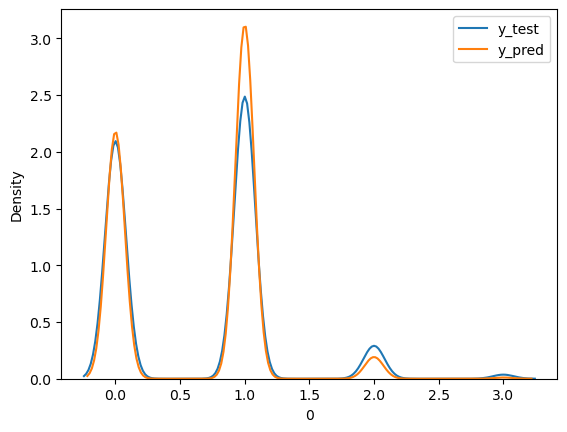

In [213]:
graph(pred_df)

In [214]:
plus(pred_df)

MSE :  0.17227099874028287 
RMSE :  0.41505541646903354 
MAE :  0.32049994817763544 
MSLE :  0.024814326745969388 
RMSLE :  0.15752563837664454


<function __main__.loss_metrics(y_true, y_pred)>

In [215]:
r2_score(y_test, y_pred10)

0.5590308580374335

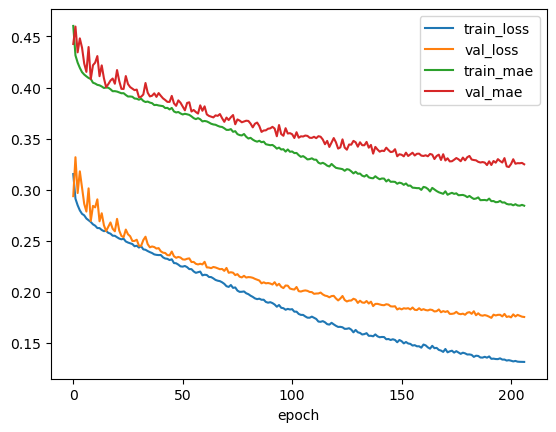

In [216]:
plt.figure()

plt.plot(history10.history["loss"], label = "train_loss")
plt.plot(history10.history["val_loss"], label = "val_loss")
plt.plot(history10.history["mae"], label = "train_mae")
plt.plot(history10.history["val_mae"], label = "val_mae")

plt.xlabel("epoch")
plt.legend()
plt.show()

- batch_size 64보다는 성능이 약간 떨어진다.

# Model11

- kernel_size = 5, stride 3
    - 한번에 특징을 학습하는 크기를 넓혀보고자 커널 사이즈를 5로 하고 스트라이드를 3으로 학습
    - 커널의 개수가 많아질수록 자연스럽게 정확도도 늘어난다는 논문 확인, 반대로 일정 커널 개수 이후부터는 오히려 정확도가 낮아지거나 비슷한 정확도를 유지하지만 학습시간만 오래 걸린다고 한다. 이는 너무 많은 커널 개수로 인해 실질적으로 학습에 참여하지 않는 잉여 커널이 생기게 되는 경우이며 오히려 학습에 방해를 줄 수 있다.
- https://koreascience.kr/article/JAKO201908071718621.pdf


- optimizer = Adam (learning_rate = 0.0001)
- loss = "mse"
- epochs = 1000, batch_size = 64
- kernel_size = 5
- strides = 3


- Conv1D(64)
- MaxPool1D(3)
- Dropout(0.3)
- Conv1D(64)
- MaxPool1D(3)
- Dropout(0.3)
- Dense(64)
- Dropout(0.3)

In [256]:
scaled_train.shape, scaled_test.shape

((40305, 951, 1), (26871, 951, 1))

In [257]:
model11 = Sequential()
model11.add(Conv1D(filters = 64, kernel_size=5, activation = "relu", padding = "same", strides = 3, input_shape = (951,1)))
model11.add(Dropout(0.3))
model11.add(Conv1D(filters = 64, kernel_size=5, activation = "relu", padding = "same", strides = 3))
model11.add(Dropout(0.3))
model11.add(keras.layers.Flatten())
model11.add(Dense(64, activation = "relu"))
model11.add(Dropout(0.3))
model11.add(Dense(1))

In [258]:
model11.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_27 (Conv1D)          (None, 317, 64)           384       
                                                                 
 dropout_41 (Dropout)        (None, 317, 64)           0         
                                                                 
 conv1d_28 (Conv1D)          (None, 106, 64)           20544     
                                                                 
 dropout_42 (Dropout)        (None, 106, 64)           0         
                                                                 
 flatten_14 (Flatten)        (None, 6784)              0         
                                                                 
 dense_34 (Dense)            (None, 64)                434240    
                                                                 
 dropout_43 (Dropout)        (None, 64)              

In [259]:
checkpoint = keras.callbacks.ModelCheckpoint("./model/epoch_best_model11.h5", save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 15, restore_best_weights = True)
adam = keras.optimizers.Adam(learning_rate = 0.0001)
model11.compile(loss = "mse", optimizer = adam, metrics = ["mae"] )
history11 = model11.fit(scaled_train, y_train, validation_split = 0.2, epochs = 1000, callbacks = [early_stopping_cb, checkpoint], batch_size = 64)

Epoch 1/1000
504/504 [==============================] - 24s 46ms/step - loss: 0.3144 - mae: 0.4591 - val_loss: 0.2789 - val_mae: 0.4196
Epoch 2/1000
504/504 [==============================] - 22s 44ms/step - loss: 0.2848 - mae: 0.4249 - val_loss: 0.2738 - val_mae: 0.4150
Epoch 3/1000
504/504 [==============================] - 22s 43ms/step - loss: 0.2795 - mae: 0.4194 - val_loss: 0.2696 - val_mae: 0.4092
Epoch 4/1000
504/504 [==============================] - 21s 43ms/step - loss: 0.2756 - mae: 0.4149 - val_loss: 0.2726 - val_mae: 0.4081
Epoch 5/1000
504/504 [==============================] - 22s 43ms/step - loss: 0.2741 - mae: 0.4128 - val_loss: 0.2679 - val_mae: 0.4062
Epoch 6/1000
504/504 [==============================] - 22s 43ms/step - loss: 0.2701 - mae: 0.4092 - val_loss: 0.2638 - val_mae: 0.4017
Epoch 7/1000
504/504 [==============================] - 21s 43ms/step - loss: 0.2698 - mae: 0.4087 - val_loss: 0.2639 - val_mae: 0.4035
Epoch 8/1000
504/504 [==========================

Epoch 61/1000
504/504 [==============================] - 21s 42ms/step - loss: 0.2203 - mae: 0.3711 - val_loss: 0.2287 - val_mae: 0.3707
Epoch 62/1000
504/504 [==============================] - 21s 43ms/step - loss: 0.2195 - mae: 0.3695 - val_loss: 0.2244 - val_mae: 0.3722
Epoch 63/1000
504/504 [==============================] - 22s 43ms/step - loss: 0.2194 - mae: 0.3694 - val_loss: 0.2224 - val_mae: 0.3710
Epoch 64/1000
504/504 [==============================] - 22s 43ms/step - loss: 0.2184 - mae: 0.3690 - val_loss: 0.2214 - val_mae: 0.3637
Epoch 65/1000
504/504 [==============================] - 21s 42ms/step - loss: 0.2180 - mae: 0.3671 - val_loss: 0.2224 - val_mae: 0.3733
Epoch 66/1000
504/504 [==============================] - 21s 42ms/step - loss: 0.2161 - mae: 0.3662 - val_loss: 0.2204 - val_mae: 0.3692
Epoch 67/1000
504/504 [==============================] - 21s 42ms/step - loss: 0.2146 - mae: 0.3655 - val_loss: 0.2197 - val_mae: 0.3695
Epoch 68/1000
504/504 [==================

504/504 [==============================] - 21s 42ms/step - loss: 0.1582 - mae: 0.3137 - val_loss: 0.1835 - val_mae: 0.3352
Epoch 180/1000
504/504 [==============================] - 21s 42ms/step - loss: 0.1580 - mae: 0.3136 - val_loss: 0.1818 - val_mae: 0.3301
Epoch 181/1000
504/504 [==============================] - 21s 42ms/step - loss: 0.1573 - mae: 0.3123 - val_loss: 0.1803 - val_mae: 0.3316
Epoch 182/1000
504/504 [==============================] - 21s 42ms/step - loss: 0.1577 - mae: 0.3130 - val_loss: 0.1806 - val_mae: 0.3303
Epoch 183/1000
504/504 [==============================] - 21s 42ms/step - loss: 0.1585 - mae: 0.3137 - val_loss: 0.1819 - val_mae: 0.3320
Epoch 184/1000
504/504 [==============================] - 22s 43ms/step - loss: 0.1578 - mae: 0.3138 - val_loss: 0.1835 - val_mae: 0.3337
Epoch 185/1000
504/504 [==============================] - 21s 42ms/step - loss: 0.1576 - mae: 0.3134 - val_loss: 0.1802 - val_mae: 0.3336
Epoch 186/1000
504/504 [=========================

504/504 [==============================] - 21s 42ms/step - loss: 0.1309 - mae: 0.2846 - val_loss: 0.1682 - val_mae: 0.3179
Epoch 298/1000
504/504 [==============================] - 22s 44ms/step - loss: 0.1304 - mae: 0.2839 - val_loss: 0.1668 - val_mae: 0.3131
Epoch 299/1000
504/504 [==============================] - 22s 44ms/step - loss: 0.1310 - mae: 0.2845 - val_loss: 0.1697 - val_mae: 0.3219
Epoch 300/1000
504/504 [==============================] - 22s 43ms/step - loss: 0.1311 - mae: 0.2834 - val_loss: 0.1698 - val_mae: 0.3217
Epoch 301/1000
504/504 [==============================] - 22s 43ms/step - loss: 0.1312 - mae: 0.2840 - val_loss: 0.1677 - val_mae: 0.3139
Epoch 302/1000
504/504 [==============================] - 22s 43ms/step - loss: 0.1299 - mae: 0.2827 - val_loss: 0.1681 - val_mae: 0.3205
Epoch 303/1000
504/504 [==============================] - 22s 43ms/step - loss: 0.1311 - mae: 0.2843 - val_loss: 0.1711 - val_mae: 0.3182
Epoch 304/1000
504/504 [=========================

In [260]:
y_pred11 = model11.predict(scaled_test)

840/840 [==============================] - 2s 3ms/step


In [261]:
pred_df = pd.DataFrame(y_pred11, y_test).reset_index()

In [262]:
pred_df

,PM10_y_bin,0
0,1,1.179105
1,1,0.461383
2,1,0.906205
3,0,0.528051
4,0,0.361917
...,...,...
26866,3,2.126565
26867,1,0.802676
26868,0,0.196779
26869,1,0.631372


C:\Users\tmdwn\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\tmdwn\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


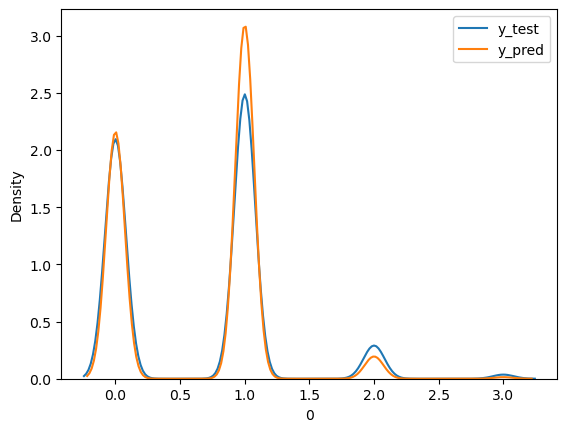

In [263]:
graph(pred_df)

In [270]:
plus(pred_df)

MSE :  0.15801049382245402 
RMSE :  0.39750533810560834 
MAE :  0.3060944472293638 
MSLE :  0.022789362089936937 
RMSLE :  0.15096145895538018


<function __main__.loss_metrics(y_true, y_pred)>

In [264]:
r2_score(y_test, y_pred11)

0.5955340574357748

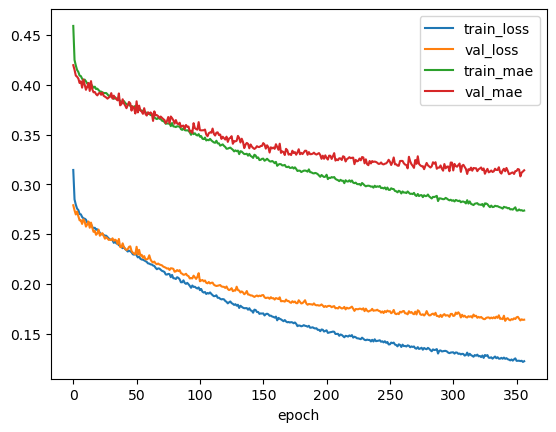

In [265]:
plt.figure()

plt.plot(history11.history["loss"], label = "train_loss")
plt.plot(history11.history["val_loss"], label = "val_loss")
plt.plot(history11.history["mae"], label = "train_mae")
plt.plot(history11.history["val_mae"], label = "val_mae")

plt.xlabel("epoch")
plt.legend()
plt.show()

- kernel_size = 5로 설정한 모델이 약간의 미세한 차이로 성능이 좋음

# Model12

- kernel_size = 5, stride 5

In [277]:
scaled_train.shape, scaled_test.shape

((40305, 951, 1), (26871, 951, 1))

In [278]:
model12 = Sequential()
model12.add(Conv1D(filters = 64, kernel_size=5, activation = "relu", padding = "same", strides = 5, input_shape = (951,1)))
model12.add(Dropout(0.3))
model12.add(Conv1D(filters = 64, kernel_size=5, activation = "relu", padding = "same", strides = 5))
model12.add(Dropout(0.3))
model12.add(keras.layers.Flatten())
model12.add(Dense(64, activation = "relu"))
model12.add(Dropout(0.3))
model12.add(Dense(1))

In [279]:
model12.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_31 (Conv1D)          (None, 191, 64)           384       
                                                                 
 dropout_47 (Dropout)        (None, 191, 64)           0         
                                                                 
 conv1d_32 (Conv1D)          (None, 39, 64)            20544     
                                                                 
 dropout_48 (Dropout)        (None, 39, 64)            0         
                                                                 
 flatten_16 (Flatten)        (None, 2496)              0         
                                                                 
 dense_38 (Dense)            (None, 64)                159808    
                                                                 
 dropout_49 (Dropout)        (None, 64)              

In [280]:
checkpoint = keras.callbacks.ModelCheckpoint("./model/epoch_best_model12.h5", save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 15, restore_best_weights = True)
adam = keras.optimizers.Adam(learning_rate = 0.0001)
model12.compile(loss = "mse", optimizer = adam, metrics = ["mae"] )
history12 = model12.fit(scaled_train, y_train, validation_split = 0.2, epochs = 1000, callbacks = [early_stopping_cb, checkpoint], batch_size = 64)

Epoch 1/1000
504/504 [==============================] - 12s 22ms/step - loss: 0.3236 - mae: 0.4669 - val_loss: 0.2923 - val_mae: 0.4340
Epoch 2/1000
504/504 [==============================] - 11s 22ms/step - loss: 0.2868 - mae: 0.4296 - val_loss: 0.2777 - val_mae: 0.4185
Epoch 3/1000
504/504 [==============================] - 11s 22ms/step - loss: 0.2826 - mae: 0.4232 - val_loss: 0.2869 - val_mae: 0.4220
Epoch 4/1000
504/504 [==============================] - 11s 22ms/step - loss: 0.2777 - mae: 0.4176 - val_loss: 0.2717 - val_mae: 0.4092
Epoch 5/1000
504/504 [==============================] - 11s 22ms/step - loss: 0.2752 - mae: 0.4149 - val_loss: 0.2692 - val_mae: 0.4085
Epoch 6/1000
504/504 [==============================] - 11s 21ms/step - loss: 0.2738 - mae: 0.4133 - val_loss: 0.2672 - val_mae: 0.4070
Epoch 7/1000
504/504 [==============================] - 11s 21ms/step - loss: 0.2724 - mae: 0.4122 - val_loss: 0.2712 - val_mae: 0.4069
Epoch 8/1000
504/504 [==========================

Epoch 61/1000
504/504 [==============================] - 11s 21ms/step - loss: 0.2327 - mae: 0.3779 - val_loss: 0.2355 - val_mae: 0.3797
Epoch 62/1000
504/504 [==============================] - 11s 21ms/step - loss: 0.2317 - mae: 0.3777 - val_loss: 0.2321 - val_mae: 0.3785
Epoch 63/1000
504/504 [==============================] - 11s 21ms/step - loss: 0.2301 - mae: 0.3765 - val_loss: 0.2316 - val_mae: 0.3776
Epoch 64/1000
504/504 [==============================] - 11s 21ms/step - loss: 0.2293 - mae: 0.3760 - val_loss: 0.2332 - val_mae: 0.3769
Epoch 65/1000
504/504 [==============================] - 11s 22ms/step - loss: 0.2285 - mae: 0.3745 - val_loss: 0.2307 - val_mae: 0.3761
Epoch 66/1000
504/504 [==============================] - 11s 21ms/step - loss: 0.2298 - mae: 0.3763 - val_loss: 0.2309 - val_mae: 0.3773
Epoch 67/1000
504/504 [==============================] - 11s 21ms/step - loss: 0.2278 - mae: 0.3739 - val_loss: 0.2316 - val_mae: 0.3785
Epoch 68/1000
504/504 [==================

504/504 [==============================] - 11s 23ms/step - loss: 0.1749 - mae: 0.3280 - val_loss: 0.1895 - val_mae: 0.3384
Epoch 180/1000
504/504 [==============================] - 11s 23ms/step - loss: 0.1751 - mae: 0.3289 - val_loss: 0.1931 - val_mae: 0.3447
Epoch 181/1000
504/504 [==============================] - 11s 22ms/step - loss: 0.1739 - mae: 0.3277 - val_loss: 0.1900 - val_mae: 0.3412
Epoch 182/1000
504/504 [==============================] - 11s 22ms/step - loss: 0.1745 - mae: 0.3283 - val_loss: 0.1896 - val_mae: 0.3389
Epoch 183/1000
504/504 [==============================] - 12s 24ms/step - loss: 0.1753 - mae: 0.3290 - val_loss: 0.1916 - val_mae: 0.3440
Epoch 184/1000
504/504 [==============================] - 11s 22ms/step - loss: 0.1739 - mae: 0.3265 - val_loss: 0.1911 - val_mae: 0.3426
Epoch 185/1000
504/504 [==============================] - 12s 23ms/step - loss: 0.1734 - mae: 0.3270 - val_loss: 0.1900 - val_mae: 0.3397
Epoch 186/1000
504/504 [=========================

In [281]:
y_pred12 = model12.predict(scaled_test)

840/840 [==============================] - 2s 2ms/step


In [282]:
pred_df = pd.DataFrame(y_pred12, y_test).reset_index()

In [283]:
pred_df

,PM10_y_bin,0
0,1,1.179892
1,1,0.258478
2,1,0.784010
3,0,0.393839
4,0,0.311221
...,...,...
26866,3,2.082449
26867,1,0.728505
26868,0,0.111933
26869,1,0.667364


C:\Users\tmdwn\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\tmdwn\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


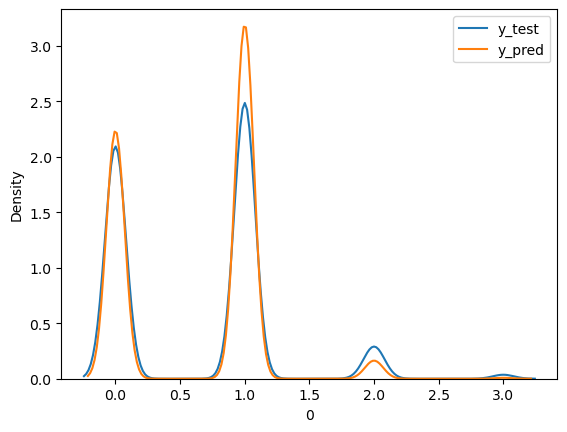

In [284]:
graph(pred_df)

In [285]:
plus(pred_df)

MSE :  0.17514926597648078 
RMSE :  0.418508382205758 
MAE :  0.32187329467985887 
MSLE :  0.024908171129203606 
RMSLE :  0.157823227470495


<function __main__.loss_metrics(y_true, y_pred)>

In [286]:
r2_score(y_test, y_pred12)

0.5516632393275736

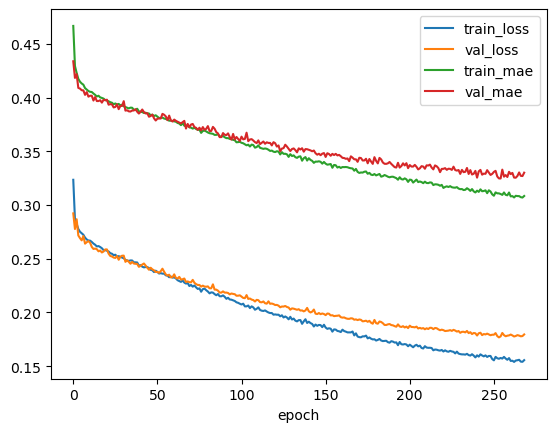

In [287]:
plt.figure()

plt.plot(history12.history["loss"], label = "train_loss")
plt.plot(history12.history["val_loss"], label = "val_loss")
plt.plot(history12.history["mae"], label = "train_mae")
plt.plot(history12.history["val_mae"], label = "val_mae")

plt.xlabel("epoch")
plt.legend()
plt.show()

# Model13

- 지금까지 가장 좋은 성능을 보인 모델의 batch_size를 128로 학습해보자

In [123]:
scaled_train.shape, scaled_test.shape

((40305, 951, 1), (26871, 951, 1))

In [124]:
model13 = Sequential()
model13.add(Conv1D(filters = 64, kernel_size=5, activation = "relu", padding = "same", strides = 3, input_shape = (951,1)))
model13.add(Dropout(0.3))
model13.add(Conv1D(filters = 64, kernel_size=5, activation = "relu", padding = "same", strides = 3))
model13.add(Dropout(0.3))
model13.add(keras.layers.Flatten())
model13.add(Dense(64, activation = "relu"))
model13.add(Dropout(0.3))
model13.add(Dense(1))

In [125]:
model13.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 317, 64)           384       
                                                                 
 dropout_6 (Dropout)         (None, 317, 64)           0         
                                                                 
 conv1d_5 (Conv1D)           (None, 106, 64)           20544     
                                                                 
 dropout_7 (Dropout)         (None, 106, 64)           0         
                                                                 
 flatten_2 (Flatten)         (None, 6784)              0         
                                                                 
 dense_4 (Dense)             (None, 64)                434240    
                                                                 
 dropout_8 (Dropout)         (None, 64)               

In [126]:
checkpoint = keras.callbacks.ModelCheckpoint("./model/epoch_best_model13.h5", save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 15, restore_best_weights = True)
adam = keras.optimizers.Adam(learning_rate = 0.0001)
model13.compile(loss = "mse", optimizer = adam, metrics = ["mae"] )
history13 = model13.fit(scaled_train, y_train, validation_split = 0.2, epochs = 1000, callbacks = [early_stopping_cb, checkpoint], batch_size = 128)

Epoch 1/1000
252/252 [==============================] - 18s 66ms/step - loss: 0.3290 - mae: 0.4705 - val_loss: 0.2915 - val_mae: 0.4351
Epoch 2/1000
252/252 [==============================] - 17s 67ms/step - loss: 0.2889 - mae: 0.4333 - val_loss: 0.2788 - val_mae: 0.4217
Epoch 3/1000
252/252 [==============================] - 17s 67ms/step - loss: 0.2825 - mae: 0.4260 - val_loss: 0.2794 - val_mae: 0.4177
Epoch 4/1000
252/252 [==============================] - 17s 68ms/step - loss: 0.2790 - mae: 0.4208 - val_loss: 0.2815 - val_mae: 0.4180
Epoch 5/1000
252/252 [==============================] - 17s 68ms/step - loss: 0.2773 - mae: 0.4187 - val_loss: 0.2783 - val_mae: 0.4178
Epoch 6/1000
252/252 [==============================] - 17s 67ms/step - loss: 0.2734 - mae: 0.4142 - val_loss: 0.2684 - val_mae: 0.4074
Epoch 7/1000
252/252 [==============================] - 17s 67ms/step - loss: 0.2740 - mae: 0.4147 - val_loss: 0.2718 - val_mae: 0.4112
Epoch 8/1000
252/252 [==========================

Epoch 61/1000
252/252 [==============================] - 18s 71ms/step - loss: 0.2320 - mae: 0.3780 - val_loss: 0.2343 - val_mae: 0.3766
Epoch 62/1000
252/252 [==============================] - 17s 69ms/step - loss: 0.2315 - mae: 0.3783 - val_loss: 0.2350 - val_mae: 0.3792
Epoch 63/1000
252/252 [==============================] - 18s 70ms/step - loss: 0.2309 - mae: 0.3782 - val_loss: 0.2360 - val_mae: 0.3828
Epoch 64/1000
252/252 [==============================] - 18s 70ms/step - loss: 0.2308 - mae: 0.3769 - val_loss: 0.2316 - val_mae: 0.3788
Epoch 65/1000
252/252 [==============================] - 18s 70ms/step - loss: 0.2303 - mae: 0.3765 - val_loss: 0.2316 - val_mae: 0.3791
Epoch 66/1000
252/252 [==============================] - 18s 69ms/step - loss: 0.2299 - mae: 0.3776 - val_loss: 0.2316 - val_mae: 0.3757
Epoch 67/1000
252/252 [==============================] - 17s 69ms/step - loss: 0.2290 - mae: 0.3762 - val_loss: 0.2353 - val_mae: 0.3831
Epoch 68/1000
252/252 [==================

252/252 [==============================] - 17s 66ms/step - loss: 0.1701 - mae: 0.3237 - val_loss: 0.1884 - val_mae: 0.3380
Epoch 180/1000
252/252 [==============================] - 17s 67ms/step - loss: 0.1697 - mae: 0.3244 - val_loss: 0.1883 - val_mae: 0.3361
Epoch 181/1000
252/252 [==============================] - 17s 67ms/step - loss: 0.1692 - mae: 0.3229 - val_loss: 0.1879 - val_mae: 0.3362
Epoch 182/1000
252/252 [==============================] - 17s 66ms/step - loss: 0.1692 - mae: 0.3234 - val_loss: 0.1882 - val_mae: 0.3370
Epoch 183/1000
252/252 [==============================] - 17s 67ms/step - loss: 0.1689 - mae: 0.3224 - val_loss: 0.1882 - val_mae: 0.3344
Epoch 184/1000
252/252 [==============================] - 17s 67ms/step - loss: 0.1686 - mae: 0.3232 - val_loss: 0.1877 - val_mae: 0.3353
Epoch 185/1000
252/252 [==============================] - 17s 67ms/step - loss: 0.1677 - mae: 0.3220 - val_loss: 0.1884 - val_mae: 0.3366
Epoch 186/1000
252/252 [=========================

252/252 [==============================] - 17s 67ms/step - loss: 0.1382 - mae: 0.2898 - val_loss: 0.1704 - val_mae: 0.3154
Epoch 298/1000
252/252 [==============================] - 17s 67ms/step - loss: 0.1382 - mae: 0.2907 - val_loss: 0.1731 - val_mae: 0.3211
Epoch 299/1000
252/252 [==============================] - 17s 67ms/step - loss: 0.1368 - mae: 0.2887 - val_loss: 0.1692 - val_mae: 0.3141
Epoch 300/1000
252/252 [==============================] - 17s 67ms/step - loss: 0.1372 - mae: 0.2892 - val_loss: 0.1712 - val_mae: 0.3170
Epoch 301/1000
252/252 [==============================] - 17s 67ms/step - loss: 0.1373 - mae: 0.2895 - val_loss: 0.1698 - val_mae: 0.3147
Epoch 302/1000
252/252 [==============================] - 17s 67ms/step - loss: 0.1358 - mae: 0.2878 - val_loss: 0.1695 - val_mae: 0.3146
Epoch 303/1000
252/252 [==============================] - 17s 67ms/step - loss: 0.1345 - mae: 0.2872 - val_loss: 0.1700 - val_mae: 0.3160
Epoch 304/1000
252/252 [=========================

252/252 [==============================] - 17s 67ms/step - loss: 0.1179 - mae: 0.2677 - val_loss: 0.1606 - val_mae: 0.3039
Epoch 416/1000
252/252 [==============================] - 17s 67ms/step - loss: 0.1182 - mae: 0.2674 - val_loss: 0.1607 - val_mae: 0.3058
Epoch 417/1000
252/252 [==============================] - 17s 67ms/step - loss: 0.1192 - mae: 0.2694 - val_loss: 0.1610 - val_mae: 0.3067
Epoch 418/1000
252/252 [==============================] - 17s 67ms/step - loss: 0.1172 - mae: 0.2670 - val_loss: 0.1612 - val_mae: 0.3067
Epoch 419/1000
252/252 [==============================] - 19s 74ms/step - loss: 0.1199 - mae: 0.2698 - val_loss: 0.1604 - val_mae: 0.3052
Epoch 420/1000
252/252 [==============================] - 18s 70ms/step - loss: 0.1176 - mae: 0.2676 - val_loss: 0.1611 - val_mae: 0.3056
Epoch 421/1000
252/252 [==============================] - 17s 68ms/step - loss: 0.1180 - mae: 0.2676 - val_loss: 0.1626 - val_mae: 0.3059
Epoch 422/1000
252/252 [=========================

In [127]:
y_pred13 = model13.predict(scaled_test)

840/840 [==============================] - 2s 2ms/step


In [128]:
pred_df = pd.DataFrame(y_pred13, y_test).reset_index()

In [129]:
pred_df

,PM10_y_bin,0
0,1,1.091231
1,1,0.590321
2,1,0.920079
3,0,0.293107
4,0,0.288348
...,...,...
26866,3,2.441653
26867,1,0.711711
26868,0,0.040713
26869,1,0.573787


C:\Users\tmdwn\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\tmdwn\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


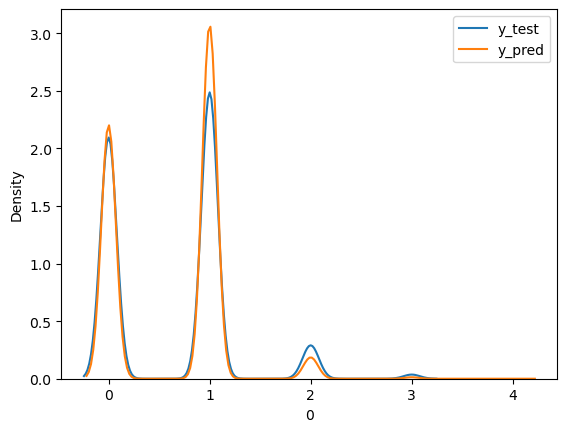

In [130]:
graph(pred_df)

In [131]:
plus(pred_df)

MSE :  0.1548472185790466 
RMSE :  0.39350631326453533 
MAE :  0.2978755346880321 
MSLE :  0.022144688833503297 
RMSLE :  0.1488109163788171


<function __main__.loss_metrics(y_true, y_pred)>

In [132]:
r2_score(y_test, y_pred13)

0.6036312228326026

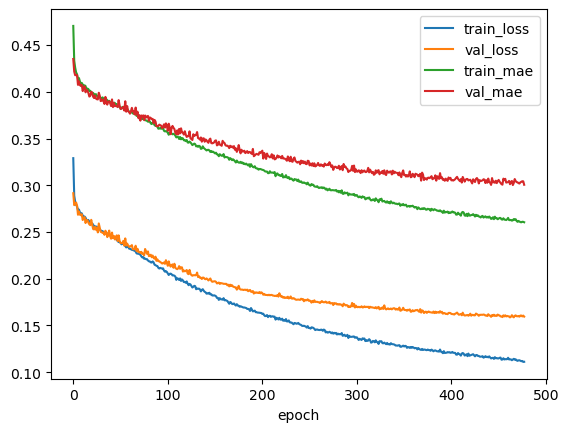

In [133]:
plt.figure()

plt.plot(history13.history["loss"], label = "train_loss")
plt.plot(history13.history["val_loss"], label = "val_loss")
plt.plot(history13.history["mae"], label = "train_mae")
plt.plot(history13.history["val_mae"], label = "val_mae")

plt.xlabel("epoch")
plt.legend()
plt.show()

- 가장 성능이 좋은 모델이다!!

# Model14

- batch_size = 256

In [138]:
scaled_train.shape, scaled_test.shape

((40305, 951, 1), (26871, 951, 1))

In [139]:
model14 = Sequential()
model14.add(Conv1D(filters = 64, kernel_size=5, activation = "relu", padding = "same", strides = 3, input_shape = (951,1)))
model14.add(Dropout(0.3))
model14.add(Conv1D(filters = 64, kernel_size=5, activation = "relu", padding = "same", strides = 3))
model14.add(Dropout(0.3))
model14.add(keras.layers.Flatten())
model14.add(Dense(64, activation = "relu"))
model14.add(Dropout(0.3))
model14.add(Dense(1))

In [140]:
model14.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 317, 64)           384       
                                                                 
 dropout_12 (Dropout)        (None, 317, 64)           0         
                                                                 
 conv1d_9 (Conv1D)           (None, 106, 64)           20544     
                                                                 
 dropout_13 (Dropout)        (None, 106, 64)           0         
                                                                 
 flatten_4 (Flatten)         (None, 6784)              0         
                                                                 
 dense_8 (Dense)             (None, 64)                434240    
                                                                 
 dropout_14 (Dropout)        (None, 64)               

In [141]:
checkpoint = keras.callbacks.ModelCheckpoint("./model/epoch_best_model14.h5", save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 15, restore_best_weights = True)
adam = keras.optimizers.Adam(learning_rate = 0.0001)
model14.compile(loss = "mse", optimizer = adam, metrics = ["mae"] )
history14 = model14.fit(scaled_train, y_train, validation_split = 0.2, epochs = 1000, callbacks = [early_stopping_cb, checkpoint], batch_size = 256)

Epoch 1/1000
126/126 [==============================] - 17s 127ms/step - loss: 0.3415 - mae: 0.4862 - val_loss: 0.3057 - val_mae: 0.4503
Epoch 2/1000
126/126 [==============================] - 16s 125ms/step - loss: 0.2943 - mae: 0.4381 - val_loss: 0.2829 - val_mae: 0.4263
Epoch 3/1000
126/126 [==============================] - 16s 125ms/step - loss: 0.2860 - mae: 0.4289 - val_loss: 0.2843 - val_mae: 0.4218
Epoch 4/1000
126/126 [==============================] - 16s 125ms/step - loss: 0.2812 - mae: 0.4221 - val_loss: 0.2876 - val_mae: 0.4203
Epoch 5/1000
126/126 [==============================] - 16s 125ms/step - loss: 0.2791 - mae: 0.4197 - val_loss: 0.2724 - val_mae: 0.4089
Epoch 6/1000
126/126 [==============================] - 16s 125ms/step - loss: 0.2771 - mae: 0.4181 - val_loss: 0.2755 - val_mae: 0.4142
Epoch 7/1000
126/126 [==============================] - 16s 125ms/step - loss: 0.2743 - mae: 0.4139 - val_loss: 0.2746 - val_mae: 0.4118
Epoch 8/1000
126/126 [===================

126/126 [==============================] - 16s 125ms/step - loss: 0.2138 - mae: 0.3630 - val_loss: 0.2218 - val_mae: 0.3682
Epoch 120/1000
126/126 [==============================] - 16s 125ms/step - loss: 0.2130 - mae: 0.3623 - val_loss: 0.2232 - val_mae: 0.3683
Epoch 121/1000
126/126 [==============================] - 16s 125ms/step - loss: 0.2120 - mae: 0.3609 - val_loss: 0.2208 - val_mae: 0.3635
Epoch 122/1000
126/126 [==============================] - 16s 126ms/step - loss: 0.2135 - mae: 0.3628 - val_loss: 0.2226 - val_mae: 0.3677
Epoch 123/1000
126/126 [==============================] - 16s 125ms/step - loss: 0.2114 - mae: 0.3604 - val_loss: 0.2261 - val_mae: 0.3714
Epoch 124/1000
126/126 [==============================] - 16s 125ms/step - loss: 0.2116 - mae: 0.3610 - val_loss: 0.2205 - val_mae: 0.3638
Epoch 125/1000
126/126 [==============================] - 16s 125ms/step - loss: 0.2104 - mae: 0.3595 - val_loss: 0.2179 - val_mae: 0.3625
Epoch 126/1000
126/126 [==================

126/126 [==============================] - 16s 125ms/step - loss: 0.1897 - mae: 0.3420 - val_loss: 0.2033 - val_mae: 0.3513
Epoch 179/1000
126/126 [==============================] - 16s 125ms/step - loss: 0.1880 - mae: 0.3399 - val_loss: 0.2022 - val_mae: 0.3480
Epoch 180/1000
126/126 [==============================] - 16s 125ms/step - loss: 0.1862 - mae: 0.3389 - val_loss: 0.2028 - val_mae: 0.3536
Epoch 181/1000
126/126 [==============================] - 16s 125ms/step - loss: 0.1852 - mae: 0.3388 - val_loss: 0.2025 - val_mae: 0.3506
Epoch 182/1000
126/126 [==============================] - 16s 125ms/step - loss: 0.1858 - mae: 0.3386 - val_loss: 0.2027 - val_mae: 0.3510
Epoch 183/1000
126/126 [==============================] - 16s 126ms/step - loss: 0.1853 - mae: 0.3375 - val_loss: 0.2035 - val_mae: 0.3515
Epoch 184/1000
126/126 [==============================] - 16s 126ms/step - loss: 0.1850 - mae: 0.3374 - val_loss: 0.2025 - val_mae: 0.3504
Epoch 185/1000
126/126 [==================

126/126 [==============================] - 16s 125ms/step - loss: 0.1659 - mae: 0.3205 - val_loss: 0.1898 - val_mae: 0.3385
Epoch 238/1000
126/126 [==============================] - 16s 125ms/step - loss: 0.1678 - mae: 0.3215 - val_loss: 0.1893 - val_mae: 0.3385
Epoch 239/1000
126/126 [==============================] - 16s 125ms/step - loss: 0.1678 - mae: 0.3214 - val_loss: 0.1902 - val_mae: 0.3372
Epoch 240/1000
126/126 [==============================] - 16s 126ms/step - loss: 0.1660 - mae: 0.3193 - val_loss: 0.1902 - val_mae: 0.3367
Epoch 241/1000
126/126 [==============================] - 16s 125ms/step - loss: 0.1667 - mae: 0.3207 - val_loss: 0.1909 - val_mae: 0.3390
Epoch 242/1000
126/126 [==============================] - 16s 125ms/step - loss: 0.1668 - mae: 0.3215 - val_loss: 0.1905 - val_mae: 0.3389
Epoch 243/1000
126/126 [==============================] - 16s 125ms/step - loss: 0.1663 - mae: 0.3210 - val_loss: 0.1876 - val_mae: 0.3339
Epoch 244/1000
126/126 [==================

126/126 [==============================] - 16s 127ms/step - loss: 0.1528 - mae: 0.3071 - val_loss: 0.1805 - val_mae: 0.3283
Epoch 297/1000
126/126 [==============================] - 17s 133ms/step - loss: 0.1534 - mae: 0.3069 - val_loss: 0.1805 - val_mae: 0.3322
Epoch 298/1000
126/126 [==============================] - 16s 128ms/step - loss: 0.1539 - mae: 0.3079 - val_loss: 0.1801 - val_mae: 0.3281
Epoch 299/1000
126/126 [==============================] - 16s 127ms/step - loss: 0.1507 - mae: 0.3052 - val_loss: 0.1795 - val_mae: 0.3236
Epoch 300/1000
126/126 [==============================] - 16s 126ms/step - loss: 0.1522 - mae: 0.3059 - val_loss: 0.1798 - val_mae: 0.3287
Epoch 301/1000
126/126 [==============================] - 16s 127ms/step - loss: 0.1500 - mae: 0.3047 - val_loss: 0.1801 - val_mae: 0.3289
Epoch 302/1000
126/126 [==============================] - 16s 126ms/step - loss: 0.1513 - mae: 0.3059 - val_loss: 0.1820 - val_mae: 0.3312
Epoch 303/1000
126/126 [==================

In [142]:
y_pred14 = model14.predict(scaled_test)

840/840 [==============================] - 2s 2ms/step


In [143]:
pred_df = pd.DataFrame(y_pred14, y_test).reset_index()

In [144]:
pred_df

,PM10_y_bin,0
0,1,1.171930
1,1,0.432106
2,1,0.922753
3,0,0.512513
4,0,0.330976
...,...,...
26866,3,2.261683
26867,1,0.654486
26868,0,0.017049
26869,1,0.511605


C:\Users\tmdwn\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\tmdwn\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


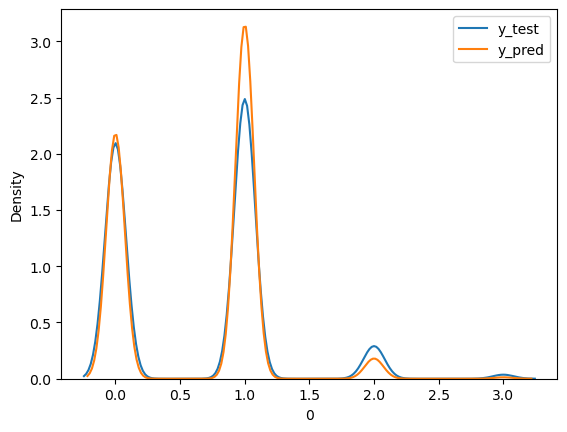

In [145]:
graph(pred_df)

In [146]:
plus(pred_df)

MSE :  0.17321140804841992 
RMSE :  0.41618674660351684 
MAE :  0.3190022171345542 
MSLE :  0.024838478185656127 
RMSLE :  0.15760227849132172


<function __main__.loss_metrics(y_true, y_pred)>

In [147]:
r2_score(y_test, y_pred14)

0.5566236537561836

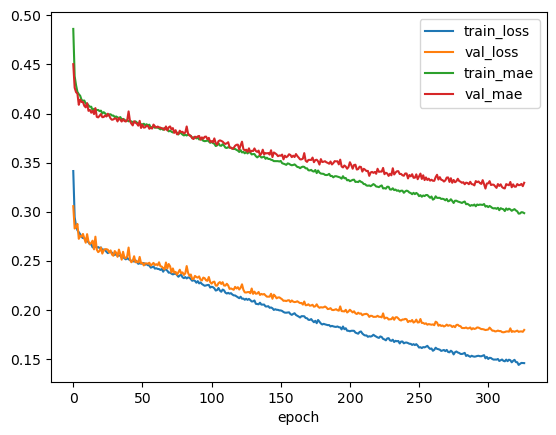

In [148]:
plt.figure()

plt.plot(history14.history["loss"], label = "train_loss")
plt.plot(history14.history["val_loss"], label = "val_loss")
plt.plot(history14.history["mae"], label = "train_mae")
plt.plot(history14.history["val_mae"], label = "val_mae")

plt.xlabel("epoch")
plt.legend()
plt.show()

- batch_size는 128이 256보다 성능이 괜찮음

# Model15

- learning_rate = 0.00001


- optimizer = Adam (learning_rate = 0.00001)
- loss = "mse"
- epochs = 1000, batch_size = 128
- kernel_size = 5
- strides = 3

In [20]:
model15 = Sequential()
model15.add(Conv1D(filters = 64, kernel_size = 5, activation = "relu", padding = "same", strides = 3, input_shape = (951,1)))
model15.add(Dropout(0.3))
model15.add(Conv1D(filters = 64, kernel_size = 5, activation = "relu", padding = "same", strides = 3))
model15.add(Dropout(0.3))
model15.add(keras.layers.Flatten())
model15.add(Dense(64, activation = "relu"))
model15.add(Dropout(0.3))
model15.add(Dense(1))

In [21]:
model15.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 317, 64)           384       
                                                                 
 dropout_3 (Dropout)         (None, 317, 64)           0         
                                                                 
 conv1d_3 (Conv1D)           (None, 106, 64)           20544     
                                                                 
 dropout_4 (Dropout)         (None, 106, 64)           0         
                                                                 
 flatten_1 (Flatten)         (None, 6784)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                434240    
                                                                 
 dropout_5 (Dropout)         (None, 64)               

In [24]:
checkpoint = keras.callbacks.ModelCheckpoint("./model/epoch_best_model15.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 15, restore_best_weights=True)
adam = keras.optimizers.Adam(learning_rate = 0.00001)
model15.compile(loss = "mse", optimizer = adam, metrics = ["mae"])
history15 = model15.fit(scaled_train, y_train, validation_split = 0.2, epochs = 1000, callbacks = [early_stopping_cb, checkpoint], batch_size = 128)

Epoch 1/1000
252/252 [==============================] - 23s 86ms/step - loss: 0.2801 - mae: 0.4203 - val_loss: 0.2824 - val_mae: 0.4197
Epoch 2/1000
252/252 [==============================] - 21s 83ms/step - loss: 0.2795 - mae: 0.4199 - val_loss: 0.2795 - val_mae: 0.4169
Epoch 3/1000
252/252 [==============================] - 21s 83ms/step - loss: 0.2797 - mae: 0.4187 - val_loss: 0.2814 - val_mae: 0.4184
Epoch 4/1000
252/252 [==============================] - 21s 83ms/step - loss: 0.2803 - mae: 0.4200 - val_loss: 0.2799 - val_mae: 0.4170
Epoch 5/1000
252/252 [==============================] - 21s 83ms/step - loss: 0.2785 - mae: 0.4185 - val_loss: 0.2811 - val_mae: 0.4174
Epoch 6/1000
252/252 [==============================] - 21s 83ms/step - loss: 0.2780 - mae: 0.4182 - val_loss: 0.2780 - val_mae: 0.4137
Epoch 7/1000
252/252 [==============================] - 21s 83ms/step - loss: 0.2786 - mae: 0.4179 - val_loss: 0.2805 - val_mae: 0.4167
Epoch 8/1000
252/252 [==========================

Epoch 61/1000
252/252 [==============================] - 21s 82ms/step - loss: 0.2667 - mae: 0.4057 - val_loss: 0.2679 - val_mae: 0.4036
Epoch 62/1000
252/252 [==============================] - 21s 82ms/step - loss: 0.2667 - mae: 0.4058 - val_loss: 0.2680 - val_mae: 0.4036
Epoch 63/1000
252/252 [==============================] - 21s 82ms/step - loss: 0.2674 - mae: 0.4060 - val_loss: 0.2718 - val_mae: 0.4068
Epoch 64/1000
252/252 [==============================] - 21s 82ms/step - loss: 0.2663 - mae: 0.4063 - val_loss: 0.2673 - val_mae: 0.4023
Epoch 65/1000
252/252 [==============================] - 21s 82ms/step - loss: 0.2670 - mae: 0.4055 - val_loss: 0.2687 - val_mae: 0.4040
Epoch 66/1000
252/252 [==============================] - 21s 82ms/step - loss: 0.2663 - mae: 0.4064 - val_loss: 0.2677 - val_mae: 0.4026
Epoch 67/1000
252/252 [==============================] - 21s 83ms/step - loss: 0.2671 - mae: 0.4049 - val_loss: 0.2679 - val_mae: 0.4032
Epoch 68/1000
252/252 [==================

In [25]:
y_pred15 = model15.predict(scaled_test)

840/840 [==============================] - 3s 3ms/step


In [26]:
pred_df = pd.DataFrame(y_pred15, y_test).reset_index()

In [27]:
pred_df

,PM10_y_bin,0
0,1,0.790273
1,1,0.435762
2,1,0.608986
3,0,0.562524
4,0,0.538106
...,...,...
26866,3,0.695886
26867,1,0.748247
26868,0,-0.072484
26869,1,0.197576


C:\Users\ITSC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\ITSC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


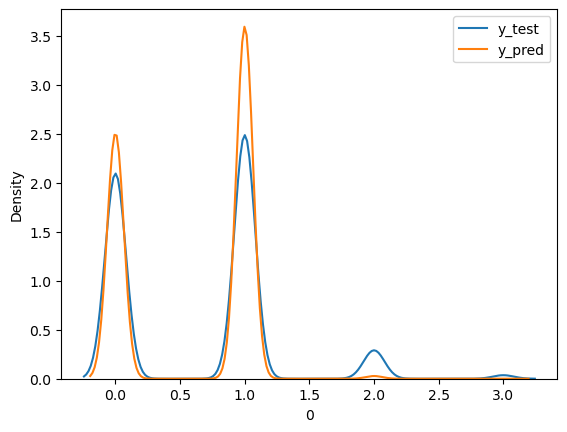

In [28]:
graph(pred_df)

In [29]:
plus(pred_df)

MSE :  0.2563747575771487 
RMSE :  0.5063346300394125 
MAE :  0.39184451253214697 
MSLE :  0.034796119501040855 
RMSLE :  0.18653717994287589


<function __main__.loss_metrics(y_true, y_pred)>

In [30]:
r2_score(y_test, y_pred15)

0.3437470166403551

- learning_rate가 0.00001일 때 0.0001 대비 성능이 굉장히 좋지 않다.

# Robust Scale 사용
- 가장 잘 나온 모델로 학습
    - 평균과 분산 대신에 중간값과 사분위값 사용, 아웃라이어의 영향을 최소화

In [183]:
rb = RobustScaler()

In [184]:
scaled_train = rb.fit_transform(x_train)
scaled_test = rb.transform(x_test)

In [185]:
scaled_train.shape, scaled_test.shape

((40305, 951), (26871, 951))

In [186]:
scaled_train = scaled_train.reshape(-1, 951, 1)
scaled_test = scaled_test.reshape(-1, 951, 1)

## Model

In [187]:
model = Sequential()
model.add(Conv1D(filters = 64, kernel_size = 5, activation = "relu", padding = "same", strides = 3, input_shape = (951,1)))
model.add(Dropout(0.3))
model.add(Conv1D(filters = 64, kernel_size = 5, activation = "relu", padding = "same", strides = 3))
model.add(Dropout(0.3))
model.add(keras.layers.Flatten())
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(1))

In [188]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_16 (Conv1D)          (None, 317, 64)           384       
                                                                 
 dropout_24 (Dropout)        (None, 317, 64)           0         
                                                                 
 conv1d_17 (Conv1D)          (None, 106, 64)           20544     
                                                                 
 dropout_25 (Dropout)        (None, 106, 64)           0         
                                                                 
 flatten_8 (Flatten)         (None, 6784)              0         
                                                                 
 dense_16 (Dense)            (None, 64)                434240    
                                                                 
 dropout_26 (Dropout)        (None, 64)               

In [189]:
checkpoint = keras.callbacks.ModelCheckpoint("./model/robust_best_model.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 15, restore_best_weights=True)
adam = keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(loss = "mse", optimizer = adam, metrics = ["mae"])
history = model.fit(scaled_train, y_train, validation_split = 0.2, epochs = 1000, callbacks = [early_stopping_cb, checkpoint], batch_size = 128)

Epoch 1/1000
252/252 [==============================] - 18s 68ms/step - loss: 0.3264 - mae: 0.4618 - val_loss: 0.3185 - val_mae: 0.4421
Epoch 2/1000
252/252 [==============================] - 17s 67ms/step - loss: 0.2839 - mae: 0.4204 - val_loss: 0.2907 - val_mae: 0.4206
Epoch 3/1000
252/252 [==============================] - 17s 67ms/step - loss: 0.2740 - mae: 0.4125 - val_loss: 0.2805 - val_mae: 0.4039
Epoch 4/1000
252/252 [==============================] - 17s 67ms/step - loss: 0.2694 - mae: 0.4079 - val_loss: 0.2668 - val_mae: 0.4011
Epoch 5/1000
252/252 [==============================] - 17s 67ms/step - loss: 0.2647 - mae: 0.4046 - val_loss: 0.2709 - val_mae: 0.4007
Epoch 6/1000
252/252 [==============================] - 17s 67ms/step - loss: 0.2632 - mae: 0.4015 - val_loss: 0.2804 - val_mae: 0.4120
Epoch 7/1000
252/252 [==============================] - 17s 67ms/step - loss: 0.2598 - mae: 0.3983 - val_loss: 0.2610 - val_mae: 0.3938
Epoch 8/1000
252/252 [==========================

Epoch 61/1000
252/252 [==============================] - 17s 67ms/step - loss: 0.1702 - mae: 0.3216 - val_loss: 0.1839 - val_mae: 0.3271
Epoch 62/1000
252/252 [==============================] - 17s 67ms/step - loss: 0.1686 - mae: 0.3194 - val_loss: 0.1860 - val_mae: 0.3323
Epoch 63/1000
252/252 [==============================] - 17s 67ms/step - loss: 0.1661 - mae: 0.3175 - val_loss: 0.1824 - val_mae: 0.3307
Epoch 64/1000
252/252 [==============================] - 17s 67ms/step - loss: 0.1664 - mae: 0.3176 - val_loss: 0.1825 - val_mae: 0.3273
Epoch 65/1000
252/252 [==============================] - 17s 67ms/step - loss: 0.1663 - mae: 0.3175 - val_loss: 0.1811 - val_mae: 0.3258
Epoch 66/1000
252/252 [==============================] - 17s 67ms/step - loss: 0.1624 - mae: 0.3144 - val_loss: 0.1825 - val_mae: 0.3274
Epoch 67/1000
252/252 [==============================] - 17s 67ms/step - loss: 0.1633 - mae: 0.3143 - val_loss: 0.1816 - val_mae: 0.3273
Epoch 68/1000
252/252 [==================

252/252 [==============================] - 17s 67ms/step - loss: 0.1038 - mae: 0.2502 - val_loss: 0.1493 - val_mae: 0.2918
Epoch 180/1000
252/252 [==============================] - 17s 67ms/step - loss: 0.1043 - mae: 0.2501 - val_loss: 0.1503 - val_mae: 0.2950
Epoch 181/1000
252/252 [==============================] - 17s 67ms/step - loss: 0.1021 - mae: 0.2474 - val_loss: 0.1500 - val_mae: 0.2956
Epoch 182/1000
252/252 [==============================] - 17s 67ms/step - loss: 0.1035 - mae: 0.2492 - val_loss: 0.1476 - val_mae: 0.2865
Epoch 183/1000
252/252 [==============================] - 17s 67ms/step - loss: 0.1028 - mae: 0.2482 - val_loss: 0.1488 - val_mae: 0.2882
Epoch 184/1000
252/252 [==============================] - 17s 67ms/step - loss: 0.1023 - mae: 0.2476 - val_loss: 0.1471 - val_mae: 0.2888
Epoch 185/1000
252/252 [==============================] - 17s 67ms/step - loss: 0.1027 - mae: 0.2471 - val_loss: 0.1481 - val_mae: 0.2878
Epoch 186/1000
252/252 [=========================

In [190]:
y_pred = model.predict(scaled_test)

840/840 [==============================] - 2s 2ms/step


In [191]:
pred_df = pd.DataFrame(y_pred, y_test).reset_index()

C:\Users\tmdwn\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\tmdwn\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


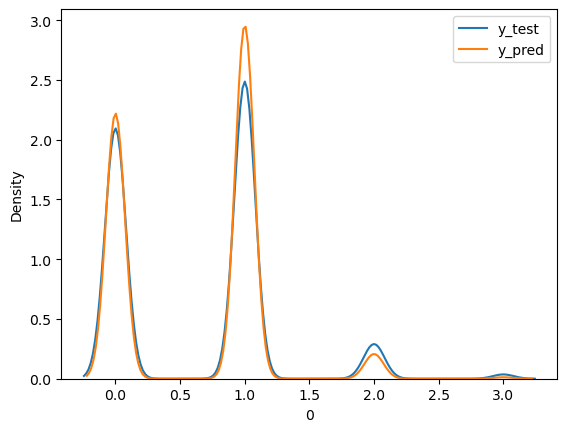

In [192]:
graph(pred_df)

In [193]:
plus(pred_df)

MSE :  0.13789400281464306 
RMSE :  0.3713408175983931 
MAE :  0.2733218100385402 
MSLE :  0.01975059667103444 
RMSLE :  0.14053681606979163


<function __main__.loss_metrics(y_true, y_pred)>

In [194]:
r2_score(y_test, y_pred)

0.647027064638837

- 학습결과
    - Robust Scaler한 모델이 가장 성능이 우수 (최종 모델)
    - 모델
        - Conv1D(64)
        - Dropout(0.3)
        - Conv1D(64)
        - Dropout(0.3)
        - Dense(64)
        - Dropout(0.3)
    - 파라미터
        - optimizer = Adam (learning_rate = 0.00001)
        - loss = "mse"
        - epochs = 1000, batch_size = 128
        - kernel_size = 5
        - strides = 3

## Model별 Accuracy 확인2

- Model7, Model11, Model13, Robust Model

In [580]:
# 저장한 model 불러오기
model7 = keras.models.load_model("./model/epoch_best_model7.h5")
model11 = keras.models.load_model("./model/epoch_best_model11.h5")
model13 = keras.models.load_model("./model/epoch_best_model13.h5")
model_rb = keras.models.load_model("./model/robust_best_model.h5")

In [581]:
# 최종 모델은 RobustScaler 사용
rb = RobustScaler()
rb_scaled_train = rb.fit_transform(x_train)
rb_scaled_test = rb.transform(x_test)

In [583]:
# 모델별 예측값 
y_pred7 = model7.predict(scaled_test)
y_pred11 = model11.predict(scaled_test)
y_pred13 = model13.predict(scaled_test)
y_pred_rb = model_rb.predict(rb_scaled_test)

840/840 [==============================] - 5s 6ms/step


In [584]:
# 모델별 정확도 확인
print("Model7 : ", accuracy_score(y_test, np.round(y_pred7)))
print("Model11 : ", accuracy_score(y_test, np.round(y_pred11)))
print("Model13 : ", accuracy_score(y_test, np.round(y_pred13)))
print("Model_rb : ", accuracy_score(y_test, np.round(y_pred_rb)))

Model7 :  0.8026496966990436
Model11 :  0.801719325667076
Model13 :  0.8070410479699304
Model_rb :  0.8286256559115776


----------------------------------------------------------------------------------------------------------------------------------

# 최종 모델에서 Optimizer를 Adam에서 RmsProop로 변경

## 훈련, 테스트 셋 분리

In [4]:
x = ndf.drop(["datetime", "PM10_y_bin"], axis = 1)
y = ndf["PM10_y_bin"]

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 8)

In [10]:
rb = RobustScaler()

In [11]:
scaled_train = rb.fit_transform(x_train)
scaled_test = rb.transform(x_test)

In [12]:
scaled_train.shape, scaled_test.shape

((40305, 951), (26871, 951))

In [13]:
scaled_train = scaled_train.reshape(-1, 951, 1)
scaled_test = scaled_test.reshape(-1, 951, 1)

## Model

In [14]:
model = Sequential()
model.add(Conv1D(filters = 64, kernel_size = 5, activation = "relu", padding = "same", strides = 3, input_shape = (951,1)))
model.add(Dropout(0.3))
model.add(Conv1D(filters = 64, kernel_size = 5, activation = "relu", padding = "same", strides = 3))
model.add(Dropout(0.3))
model.add(keras.layers.Flatten())
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(1))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 317, 64)           384       
                                                                 
 dropout (Dropout)           (None, 317, 64)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 106, 64)           20544     
                                                                 
 dropout_1 (Dropout)         (None, 106, 64)           0         
                                                                 
 flatten (Flatten)           (None, 6784)              0         
                                                                 
 dense (Dense)               (None, 64)                434240    
                                                                 
 dropout_2 (Dropout)         (None, 64)                0

In [16]:
checkpoint = keras.callbacks.ModelCheckpoint("./model/test_best_model.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 15, restore_best_weights=True)
rmsProop = keras.optimizers.RMSprop(learning_rate = 0.0001)
model.compile(loss = "mse", optimizer = rmsProop, metrics = ["mae"])
history = model.fit(scaled_train, y_train, validation_split = 0.2, epochs = 1000, callbacks = [early_stopping_cb, checkpoint], batch_size = 128)

Epoch 1/1000
252/252 [==============================] - 16s 63ms/step - loss: 0.3270 - mae: 0.4607 - val_loss: 0.2968 - val_mae: 0.4277
Epoch 2/1000
252/252 [==============================] - 15s 62ms/step - loss: 0.2894 - mae: 0.4251 - val_loss: 0.2774 - val_mae: 0.4091
Epoch 3/1000
252/252 [==============================] - 16s 62ms/step - loss: 0.2790 - mae: 0.4154 - val_loss: 0.2858 - val_mae: 0.4108
Epoch 4/1000
252/252 [==============================] - 16s 62ms/step - loss: 0.2718 - mae: 0.4093 - val_loss: 0.2773 - val_mae: 0.4117
Epoch 5/1000
252/252 [==============================] - 16s 62ms/step - loss: 0.2679 - mae: 0.4062 - val_loss: 0.2608 - val_mae: 0.3977
Epoch 6/1000
252/252 [==============================] - 16s 62ms/step - loss: 0.2640 - mae: 0.4032 - val_loss: 0.2681 - val_mae: 0.4036
Epoch 7/1000
252/252 [==============================] - 16s 62ms/step - loss: 0.2626 - mae: 0.4024 - val_loss: 0.2539 - val_mae: 0.3906
Epoch 8/1000
252/252 [==========================

Epoch 61/1000
252/252 [==============================] - 16s 62ms/step - loss: 0.1878 - mae: 0.3379 - val_loss: 0.1960 - val_mae: 0.3453
Epoch 62/1000
252/252 [==============================] - 16s 62ms/step - loss: 0.1867 - mae: 0.3369 - val_loss: 0.1954 - val_mae: 0.3448
Epoch 63/1000
252/252 [==============================] - 16s 63ms/step - loss: 0.1852 - mae: 0.3361 - val_loss: 0.1949 - val_mae: 0.3459
Epoch 64/1000
252/252 [==============================] - 16s 62ms/step - loss: 0.1850 - mae: 0.3351 - val_loss: 0.1951 - val_mae: 0.3465
Epoch 65/1000
252/252 [==============================] - 16s 63ms/step - loss: 0.1842 - mae: 0.3338 - val_loss: 0.1959 - val_mae: 0.3452
Epoch 66/1000
252/252 [==============================] - 16s 63ms/step - loss: 0.1827 - mae: 0.3341 - val_loss: 0.1924 - val_mae: 0.3416
Epoch 67/1000
252/252 [==============================] - 16s 65ms/step - loss: 0.1805 - mae: 0.3319 - val_loss: 0.1945 - val_mae: 0.3449
Epoch 68/1000
252/252 [==================

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



252/252 [==============================] - 17s 67ms/step - loss: 0.1132 - mae: 0.2605 - val_loss: 0.1548 - val_mae: 0.3031
Epoch 194/1000
252/252 [==============================] - 16s 64ms/step - loss: 0.1128 - mae: 0.2606 - val_loss: 0.1552 - val_mae: 0.3048
Epoch 195/1000
252/252 [==============================] - 16s 63ms/step - loss: 0.1139 - mae: 0.2610 - val_loss: 0.1559 - val_mae: 0.3086
Epoch 196/1000
252/252 [==============================] - 16s 64ms/step - loss: 0.1122 - mae: 0.2598 - val_loss: 0.1567 - val_mae: 0.3090
Epoch 197/1000
252/252 [==============================] - 16s 64ms/step - loss: 0.1135 - mae: 0.2617 - val_loss: 0.1575 - val_mae: 0.3111
Epoch 198/1000
252/252 [==============================] - 16s 63ms/step - loss: 0.1131 - mae: 0.2609 - val_loss: 0.1558 - val_mae: 0.3078
Epoch 199/1000
252/252 [==============================] - 16s 63ms/step - loss: 0.1121 - mae: 0.2596 - val_loss: 0.1552 - val_mae: 0.3059
Epoch 200/1000
252/252 [=========================

In [17]:
y_pred = model.predict(scaled_test)

840/840 [==============================] - 2s 2ms/step


In [18]:
pred_df = pd.DataFrame(y_pred, y_test).reset_index()

C:\Users\tmdwn\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\tmdwn\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


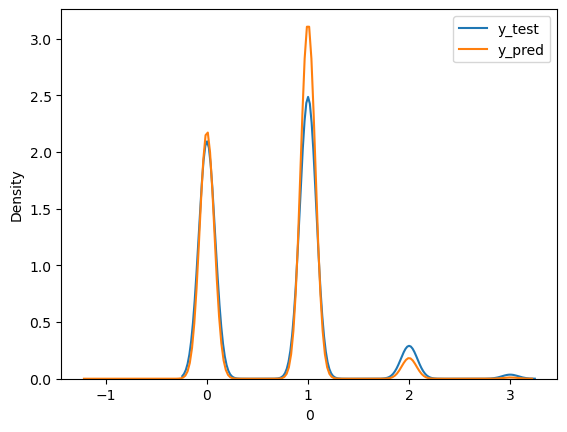

In [19]:
graph(pred_df)

In [20]:
plus(pred_df)

MSE :  0.1466308198079379 
RMSE :  0.3829240392139646 
MAE :  0.29600795373697114 
MSLE :  0.021161217233154898 
RMSLE :  0.1454689562523733


<function __main__.loss_metrics(y_true, y_pred)>

In [21]:
r2_score(y_test, y_pred)

0.6246630758003817

# 최종 모델에서 Optimizer를 Adam에서 Nadam으로 변경

## Model2

In [22]:
model21 = Sequential()
model21.add(Conv1D(filters = 64, kernel_size = 5, activation = "relu", padding = "same", strides = 3, input_shape = (951,1)))
model21.add(Dropout(0.3))
model21.add(Conv1D(filters = 64, kernel_size = 5, activation = "relu", padding = "same", strides = 3))
model21.add(Dropout(0.3))
model21.add(keras.layers.Flatten())
model21.add(Dense(64, activation = "relu"))
model21.add(Dropout(0.3))
model21.add(Dense(1))

In [23]:
model21.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 317, 64)           384       
                                                                 
 dropout_3 (Dropout)         (None, 317, 64)           0         
                                                                 
 conv1d_3 (Conv1D)           (None, 106, 64)           20544     
                                                                 
 dropout_4 (Dropout)         (None, 106, 64)           0         
                                                                 
 flatten_1 (Flatten)         (None, 6784)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                434240    
                                                                 
 dropout_5 (Dropout)         (None, 64)               

In [24]:
checkpoint = keras.callbacks.ModelCheckpoint("./model/test_best_model2.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 15, restore_best_weights=True)
Nadam = keras.optimizers.Nadam(learning_rate = 0.0001)
model21.compile(loss = "mse", optimizer = Nadam, metrics = ["mae"])
history21 = model21.fit(scaled_train, y_train, validation_split = 0.2, epochs = 1000, callbacks = [early_stopping_cb, checkpoint], batch_size = 128)

Epoch 1/1000
252/252 [==============================] - 17s 65ms/step - loss: 0.3461 - mae: 0.4742 - val_loss: 0.3039 - val_mae: 0.4323
Epoch 2/1000
252/252 [==============================] - 16s 64ms/step - loss: 0.2900 - mae: 0.4251 - val_loss: 0.2876 - val_mae: 0.4117
Epoch 3/1000
252/252 [==============================] - 16s 65ms/step - loss: 0.2796 - mae: 0.4162 - val_loss: 0.2729 - val_mae: 0.3993
Epoch 4/1000
252/252 [==============================] - 16s 65ms/step - loss: 0.2758 - mae: 0.4118 - val_loss: 0.2673 - val_mae: 0.3965
Epoch 5/1000
252/252 [==============================] - 16s 64ms/step - loss: 0.2717 - mae: 0.4077 - val_loss: 0.2749 - val_mae: 0.4003
Epoch 6/1000
252/252 [==============================] - 16s 64ms/step - loss: 0.2669 - mae: 0.4051 - val_loss: 0.2706 - val_mae: 0.3999
Epoch 7/1000
252/252 [==============================] - 16s 64ms/step - loss: 0.2671 - mae: 0.4035 - val_loss: 0.2562 - val_mae: 0.3870
Epoch 8/1000
252/252 [==========================

Epoch 61/1000
252/252 [==============================] - 16s 65ms/step - loss: 0.1811 - mae: 0.3316 - val_loss: 0.1931 - val_mae: 0.3408
Epoch 62/1000
252/252 [==============================] - 16s 65ms/step - loss: 0.1797 - mae: 0.3302 - val_loss: 0.1920 - val_mae: 0.3363
Epoch 63/1000
252/252 [==============================] - 16s 65ms/step - loss: 0.1780 - mae: 0.3288 - val_loss: 0.1927 - val_mae: 0.3404
Epoch 64/1000
252/252 [==============================] - 16s 65ms/step - loss: 0.1774 - mae: 0.3291 - val_loss: 0.1900 - val_mae: 0.3382
Epoch 65/1000
252/252 [==============================] - 16s 64ms/step - loss: 0.1763 - mae: 0.3270 - val_loss: 0.1910 - val_mae: 0.3384
Epoch 66/1000
252/252 [==============================] - 16s 65ms/step - loss: 0.1733 - mae: 0.3249 - val_loss: 0.1903 - val_mae: 0.3365
Epoch 67/1000
252/252 [==============================] - 16s 65ms/step - loss: 0.1719 - mae: 0.3229 - val_loss: 0.1890 - val_mae: 0.3362
Epoch 68/1000
252/252 [==================

252/252 [==============================] - 16s 65ms/step - loss: 0.1082 - mae: 0.2540 - val_loss: 0.1505 - val_mae: 0.2953
Epoch 186/1000
252/252 [==============================] - 16s 65ms/step - loss: 0.1077 - mae: 0.2538 - val_loss: 0.1488 - val_mae: 0.2901
Epoch 187/1000
252/252 [==============================] - 16s 65ms/step - loss: 0.1079 - mae: 0.2535 - val_loss: 0.1506 - val_mae: 0.2954
Epoch 188/1000
252/252 [==============================] - 16s 65ms/step - loss: 0.1068 - mae: 0.2517 - val_loss: 0.1516 - val_mae: 0.2972
Epoch 189/1000
252/252 [==============================] - 16s 65ms/step - loss: 0.1063 - mae: 0.2523 - val_loss: 0.1497 - val_mae: 0.2914
Epoch 190/1000
252/252 [==============================] - 16s 65ms/step - loss: 0.1051 - mae: 0.2509 - val_loss: 0.1497 - val_mae: 0.2902
Epoch 191/1000
252/252 [==============================] - 16s 65ms/step - loss: 0.1055 - mae: 0.2510 - val_loss: 0.1500 - val_mae: 0.2931
Epoch 192/1000
252/252 [=========================

In [25]:
y_pred21 = model21.predict(scaled_test)

840/840 [==============================] - 2s 2ms/step


In [26]:
pred_df = pd.DataFrame(y_pred21, y_test).reset_index()

C:\Users\tmdwn\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\tmdwn\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


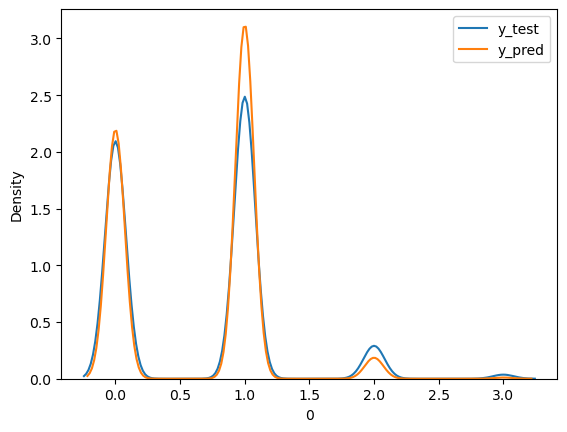

In [27]:
graph(pred_df)

In [28]:
plus(pred_df)

MSE :  0.14042468006488087 
RMSE :  0.3747328115669628 
MAE :  0.2786484033724446 
MSLE :  0.02019230452799724 
RMSLE :  0.14209962888057534


<function __main__.loss_metrics(y_true, y_pred)>

In [30]:
r2_score(y_test, y_pred21)

0.6405491862740404

|Optimizer|RMSE| 
|-----|---|
|Adam|0.3713408175983931| 
|Rmsproop|0.3829240392139646|
|Nadam|0.3747328115669628|

# 최종 모델에서 Kernel_size = 7로 변경

## Model3

In [107]:
model22 = Sequential()
model22.add(Conv1D(filters = 64, kernel_size = 7, activation = "relu", padding = "same", strides = 3, input_shape = (951,1)))
model22.add(Dropout(0.3))
model22.add(Conv1D(filters = 64, kernel_size = 7, activation = "relu", padding = "same", strides = 3))
model22.add(Dropout(0.3))
model22.add(keras.layers.Flatten())
model22.add(Dense(64, activation = "relu"))
model22.add(Dropout(0.3))
model22.add(Dense(1))

In [108]:
model22.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 317, 64)           512       
                                                                 
 dropout_9 (Dropout)         (None, 317, 64)           0         
                                                                 
 conv1d_7 (Conv1D)           (None, 106, 64)           28736     
                                                                 
 dropout_10 (Dropout)        (None, 106, 64)           0         
                                                                 
 flatten_3 (Flatten)         (None, 6784)              0         
                                                                 
 dense_6 (Dense)             (None, 64)                434240    
                                                                 
 dropout_11 (Dropout)        (None, 64)               

In [109]:
checkpoint = keras.callbacks.ModelCheckpoint("./model/test_best_model3.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 15, restore_best_weights=True)
Adam = keras.optimizers.Adam(learning_rate = 0.0001)
model22.compile(loss = "mse", optimizer = Adam, metrics = ["mae"])
history22 = model22.fit(scaled_train, y_train, validation_split = 0.2, epochs = 1000, callbacks = [early_stopping_cb, checkpoint], batch_size = 128)

Epoch 1/1000
252/252 [==============================] - 18s 69ms/step - loss: 0.3338 - mae: 0.4678 - val_loss: 0.3107 - val_mae: 0.4453
Epoch 2/1000
252/252 [==============================] - 17s 69ms/step - loss: 0.2878 - mae: 0.4258 - val_loss: 0.2755 - val_mae: 0.4064
Epoch 3/1000
252/252 [==============================] - 17s 68ms/step - loss: 0.2785 - mae: 0.4167 - val_loss: 0.2900 - val_mae: 0.4185
Epoch 4/1000
252/252 [==============================] - 17s 68ms/step - loss: 0.2724 - mae: 0.4109 - val_loss: 0.2839 - val_mae: 0.4090
Epoch 5/1000
252/252 [==============================] - 17s 69ms/step - loss: 0.2681 - mae: 0.4064 - val_loss: 0.2696 - val_mae: 0.4012
Epoch 6/1000
252/252 [==============================] - 17s 69ms/step - loss: 0.2657 - mae: 0.4060 - val_loss: 0.2632 - val_mae: 0.3956
Epoch 7/1000
252/252 [==============================] - 17s 68ms/step - loss: 0.2632 - mae: 0.4033 - val_loss: 0.2621 - val_mae: 0.3928
Epoch 8/1000
252/252 [==========================

Epoch 61/1000
252/252 [==============================] - 17s 69ms/step - loss: 0.1712 - mae: 0.3233 - val_loss: 0.1902 - val_mae: 0.3368
Epoch 62/1000
252/252 [==============================] - 17s 69ms/step - loss: 0.1702 - mae: 0.3228 - val_loss: 0.1871 - val_mae: 0.3343
Epoch 63/1000
252/252 [==============================] - 17s 69ms/step - loss: 0.1687 - mae: 0.3203 - val_loss: 0.1880 - val_mae: 0.3329
Epoch 64/1000
252/252 [==============================] - 17s 69ms/step - loss: 0.1678 - mae: 0.3193 - val_loss: 0.1872 - val_mae: 0.3343
Epoch 65/1000
252/252 [==============================] - 17s 69ms/step - loss: 0.1666 - mae: 0.3180 - val_loss: 0.1859 - val_mae: 0.3326
Epoch 66/1000
252/252 [==============================] - 17s 68ms/step - loss: 0.1648 - mae: 0.3162 - val_loss: 0.1842 - val_mae: 0.3283
Epoch 67/1000
252/252 [==============================] - 17s 69ms/step - loss: 0.1607 - mae: 0.3133 - val_loss: 0.1853 - val_mae: 0.3353
Epoch 68/1000
252/252 [==================

252/252 [==============================] - 17s 69ms/step - loss: 0.1023 - mae: 0.2479 - val_loss: 0.1488 - val_mae: 0.2929
Epoch 180/1000
252/252 [==============================] - 17s 69ms/step - loss: 0.1013 - mae: 0.2468 - val_loss: 0.1489 - val_mae: 0.2909
Epoch 181/1000
252/252 [==============================] - 17s 69ms/step - loss: 0.1008 - mae: 0.2459 - val_loss: 0.1484 - val_mae: 0.2919
Epoch 182/1000
252/252 [==============================] - 17s 69ms/step - loss: 0.1013 - mae: 0.2469 - val_loss: 0.1469 - val_mae: 0.2870
Epoch 183/1000
252/252 [==============================] - 17s 69ms/step - loss: 0.1018 - mae: 0.2469 - val_loss: 0.1479 - val_mae: 0.2898
Epoch 184/1000
252/252 [==============================] - 17s 69ms/step - loss: 0.1012 - mae: 0.2460 - val_loss: 0.1468 - val_mae: 0.2888
Epoch 185/1000
252/252 [==============================] - 17s 69ms/step - loss: 0.1001 - mae: 0.2457 - val_loss: 0.1476 - val_mae: 0.2895
Epoch 186/1000
252/252 [=========================

In [110]:
y_pred22 = model22.predict(scaled_test)

840/840 [==============================] - 2s 2ms/step


In [111]:
pred_df = pd.DataFrame(y_pred22, y_test).reset_index()

C:\Users\tmdwn\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\tmdwn\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


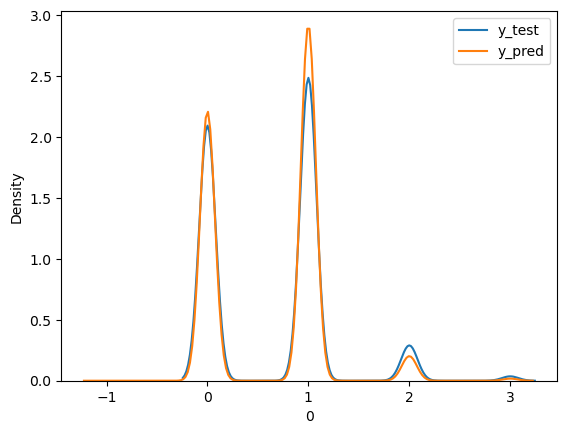

In [112]:
graph(pred_df)

In [113]:
plus(pred_df)

MSE :  0.13808151939181684 
RMSE :  0.3715932176343062 
MAE :  0.2764594290194924 
MSLE :  0.019934085276456404 
RMSLE :  0.14118812016758495


<function __main__.loss_metrics(y_true, y_pred)>

In [114]:
r2_score(y_test, y_pred22)

0.6465470707643906

## Model별 Accuracy 확인3


In [585]:
# 저장한 model 불러오기
model_ts1 = keras.models.load_model("./model/test_best_model.h5")
model_ts2 = keras.models.load_model("./model/test_best_model2.h5")
model_ts3 = keras.models.load_model("./model/test_best_model3.h5")

In [586]:
# 최종 모델은 RobustScaler 사용
rb = RobustScaler()
rb_scaled_train = rb.fit_transform(x_train)
rb_scaled_test = rb.transform(x_test)

In [587]:
# 모델별 예측값 
y_pred_ts1 = model_ts1.predict(rb_scaled_test)
y_pred_ts2 = model_ts2.predict(rb_scaled_test)
y_pred_ts3 = model_ts3.predict(rb_scaled_test)

840/840 [==============================] - 5s 6ms/step


In [588]:
# 모델별 정확도 확인
print("Model_ts1 : ", accuracy_score(y_test, np.round(y_pred_ts1)))
print("Model_ts2 : ", accuracy_score(y_test, np.round(y_pred_ts2)))
print("Model_ts3 : ", accuracy_score(y_test, np.round(y_pred_ts3)))

Model_ts1 :  0.8244948085296416
Model_ts2 :  0.827323136466823
Model_ts3 :  0.829816530832496
